# Predicting Multi-MNIST digits.

The assignment consists of three tasks:

1. A multi-class classification problem: the prediction of grayscale images of double-digit numbers from a custom version of the (Multi-)MNIST dataset.

2. Unsupervised problem: the implementation of an AutoEncoder model for the encoding and reconstruction of the provided data.

3. You can choose between (one of them is mandatory, you can choose which one to do):

*   Use latent representation of autoencoder as a feature reduction
*   Explain Neural Network predictions


The dataset is created by simply concatenating pairs of MNIST digits, and the number of classes (originally all the numbers in the [0, 100] range) has been reduced.

An example of the provided dataset is the following:

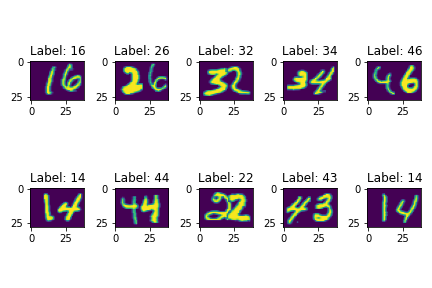

The provided data comprises the training set that can be used for the training (and for the validation) and the test set.

**General considerations**

Always describe and give proper motivations about the choices made during the assignment, including (but not limited to)

- data processing,
- network design: including number and dimension of the layers, regularization techniques (when requested).
- optimization algorithms, including hyperameters and criterions,
- model training hyperparameters
- loss/metric curves
- final evaluations and comparisons.


**Note**: Make sure that the outputs in the notebook cells are still visible once the notebook is exported (especially for html embeddings)

**Note**: Make sure that the submitted *.zip archives are not corrupted.

**Note**: convolutional layers should not be used all over this notebook (with the exception of the optional part).

##Inspecting the data

any comment about data dimensionality/distribution goes here

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

## Preparing the data

describe the choice made during the preprocessing operations, also taking into account the previous considerations during the data inspection.

In [ ]:
x_train = np.load('/content/drive/MyDrive/Magistrale/2°anno/Advanced ML/Assignment 2/x_train.npy')
y_train = np.load('/content/drive/MyDrive/Magistrale/2°anno/Advanced ML/Assignment 2/y_train.npy')
x_test = np.load('/content/drive/MyDrive/Magistrale/2°anno/Advanced ML/Assignment 2/x_test.npy')
y_test = np.load('/content/drive/MyDrive/Magistrale/2°anno/Advanced ML/Assignment 2/y_test.npy')

x_train_df = pd.DataFrame(x_train.reshape(x_train.shape[0], -1))
y_train_df = pd.DataFrame(y_train, columns=["label"])
x_test_df = pd.DataFrame(x_test.reshape(x_test.shape[0], -1))
y_test_df = pd.DataFrame(y_test, columns=["label"])

In [ ]:
print("X_train shape:", x_train.shape)
print("Y_train shape:", y_train.shape)
print("X_test shape:", x_test.shape)
print("Y_test shape:", y_test.shape)

X_train shape: (72247, 28, 39)
Y_train shape: (72247,)
X_test shape: (24083, 28, 39)
Y_test shape: (24083,)


In [ ]:
print("\nX_train DataFrame Info:")
print(x_train_df.info())
print("\nY_train DataFrame Info:")
print(y_train_df.info())


X_train DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72247 entries, 0 to 72246
Columns: 1092 entries, 0 to 1091
dtypes: uint8(1092)
memory usage: 75.2 MB
None

Y_train DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72247 entries, 0 to 72246
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   label   72247 non-null  int64
dtypes: int64(1)
memory usage: 564.6 KB
None


In [ ]:
# Check for null values
print("\nNull values in x_train_df:", x_train_df.isnull().sum().sum())
print("Null values in y_train_df:", y_train_df.isnull().sum().sum())


Null values in x_train_df: 0
Null values in y_train_df: 0


In [ ]:
print("\ny_train_df value counts:")
print(y_train_df["label"].value_counts())


y_train_df value counts:
label
11    2548
19    2403
10    2311
1     2282
16    2214
33    2159
47    2153
27    2132
36    2111
7     2102
23    2073
40    2060
15    2055
34    2050
3     2049
9     2046
26    2034
22    2029
49    2025
46    1995
20    1982
29    1979
4     1941
44    1940
28    1926
42    1894
35    1885
5     1819
45    1807
50    1770
32     832
38     792
31     787
12     766
21     646
6      641
14     634
8      560
25     555
48     526
37     477
18     471
41     444
24     413
39     406
13     358
17     318
2      292
43     279
30     276
Name: count, dtype: int64


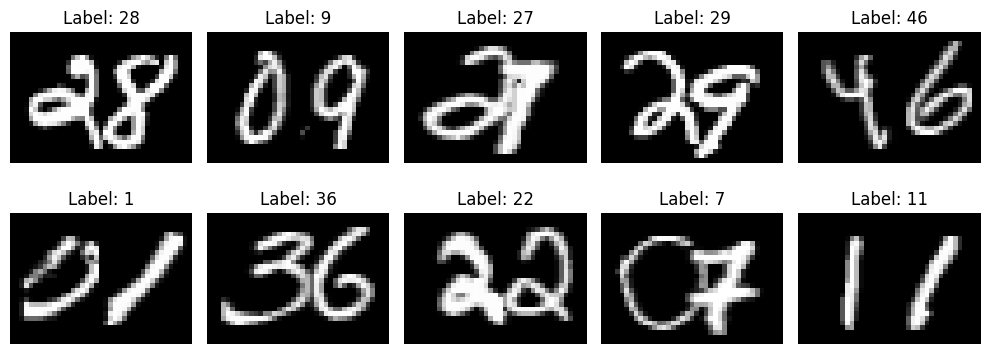

In [ ]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

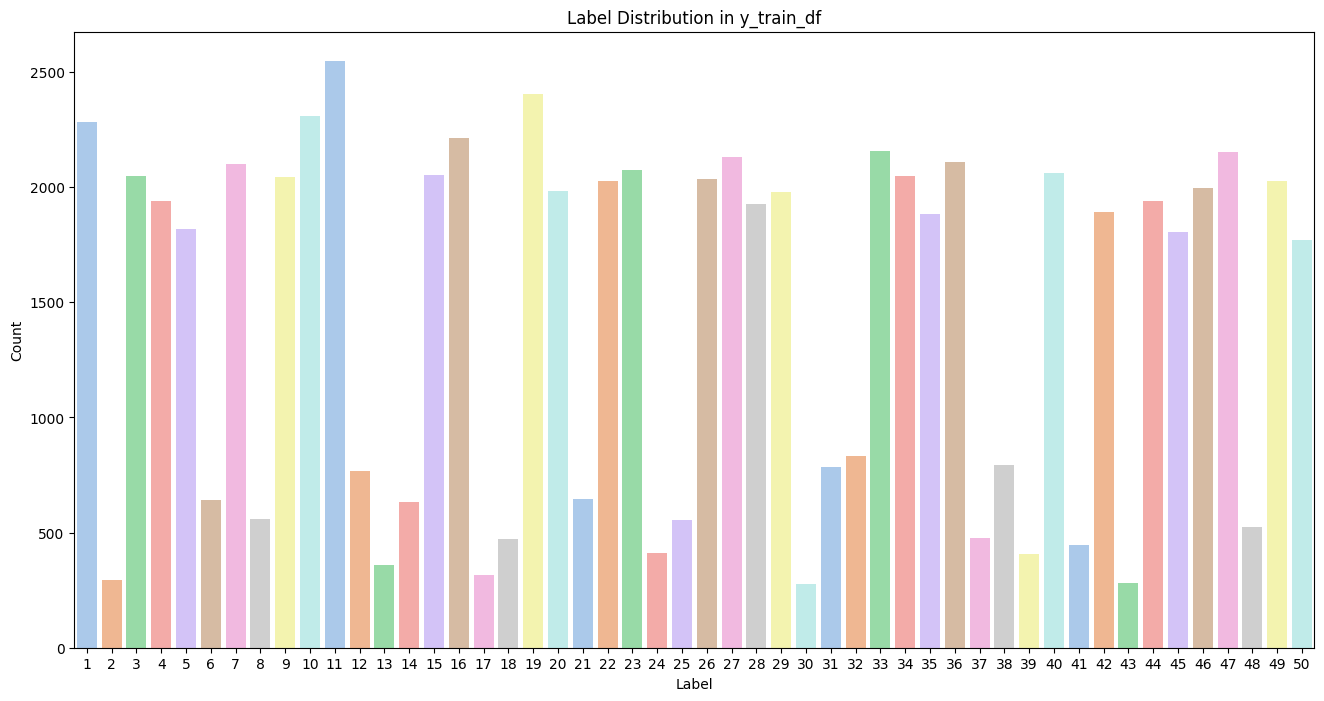

In [ ]:
plt.figure(figsize=(16, 8))
sns.countplot(data=y_train_df, x="label", palette="pastel")
plt.title("Label Distribution in y_train_df")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

There is a total of **50 labels**, so classification will involve numbers ranging from 1 to 50.

There is significantly less data associated with labels 2, 13, 17, 24, 30, 39, 41, and 43, suggesting that classification is likely to be considerably more challenging for these classes, regardless of the network used.

Insead, for classes like 10, 11, 20, and, more generally, for those with larger amounts of data, classification is expected to be easier.


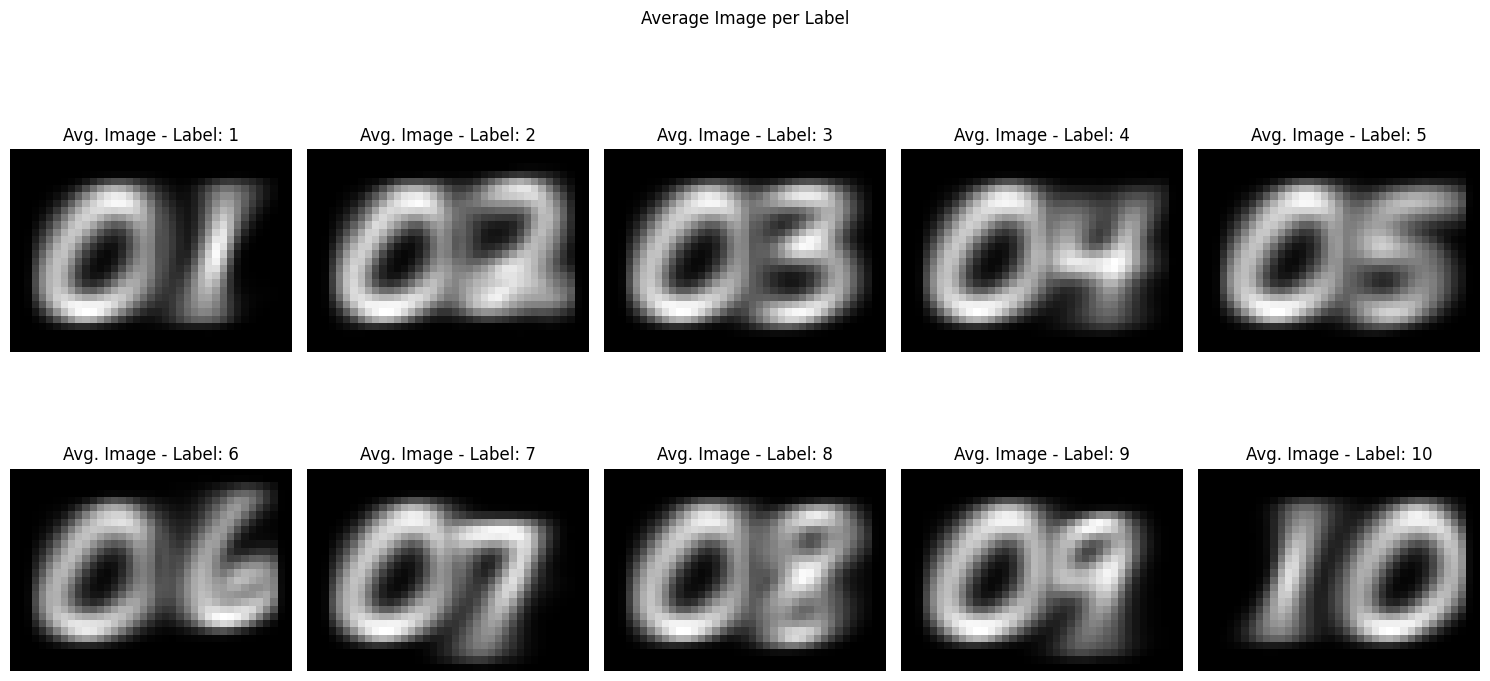

In [ ]:
unique_labels = np.unique(y_train)[:10]
plt.figure(figsize=(15, 8))
for i, label in enumerate(unique_labels):
    avg_image = x_train[y_train == label].mean(axis=0)
    plt.subplot(2, 5, i + 1)
    plt.imshow(avg_image, cmap="gray")
    plt.title(f"Avg. Image - Label: {label}")
    plt.axis("off")
plt.suptitle("Average Image per Label")
plt.tight_layout()
plt.show()

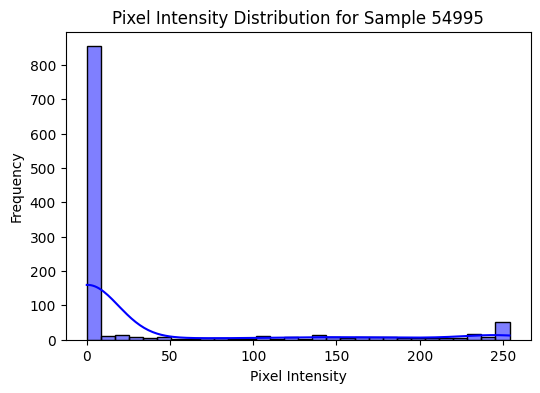

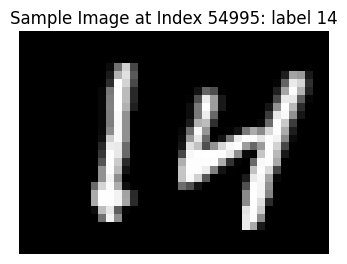

In [ ]:
random_index = np.random.randint(0, len(x_train))
plt.figure(figsize=(6, 4))
sns.histplot(x_train[random_index].ravel(), bins=30, kde=True, color="blue")
plt.title(f"Pixel Intensity Distribution for Sample {random_index}")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(4, 4))
plt.imshow(x_train[random_index], cmap="gray")
plt.title(f"Sample Image at Index {random_index}: label {y_train[random_index]}")
plt.axis("off")
plt.show()

In [ ]:
def preprocess_mnist(x_train, y_train):
  x_train = x_train.reshape(x_train.shape[0], 28*39)
  x_train = x_train.astype('float32')
  x_train /= 255
  y_train = to_categorical(y_train)
  return x_train, y_train

In [ ]:
x_train, y_train = preprocess_mnist(x_train, y_train)
x_test, y_test = preprocess_mnist(x_test, y_test)

In [ ]:
print("X_train shape:", x_train.shape)
print("Y_train shape:", y_train.shape)
print("X_test shape:", x_test.shape)
print("Y_test shape:", y_test.shape)

X_train shape: (72247, 1092)
Y_train shape: (72247, 51)
X_test shape: (24083, 1092)
Y_test shape: (24083, 51)


Each MNIST image in x_train is originally in a 2D format (28 by 39 pixels). However, the neural networks expect a 1D array as input. So, we reshape each 28x39 image into a flat array of 1092 elements (28 * 39).

Then we first convert the pixel values to float32, which is often the preferred data type for neural networks. Then, we normalize each pixel value from its original range [0, 255] (as MNIST images are grayscale) to a [0, 1] range.

And then we trasform y_train and y_test, which consists of integer labels, into a one-hot encoded format. In one-hot encoding, each label is converted into a binary vector, with a length equal to the number of classes.

# 1. The resolution of the problem of supervised classification with traditional fully-connected neural networks. [Mandatory]





You are required to implement two models, without and with the use of one (or more) regularization technique of your choice, and to compare their behaviours, in terms of training dynamics and generalization capabilities.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Input, Dropout
from keras.models import Sequential
from keras.optimizers import Adam, SGD
from keras.losses import BinaryCrossentropy
import keras.metrics as kmetrics

In [ ]:
dims = x_train.shape[1]
print('Input Shape =', dims)

nb_classes = y_train.shape[1]
print('Number classes = Output Shape =', nb_classes)

Input Shape = 1092
Number classes = Output Shape = 51


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

## 1.1 Non-regularized Model

In this section, you are required to attempt to solve the classification task with the implementation and training of a standard fully-connected Neural Network, without the use of any specific regularization technique.

### 1.1.1 Building the network

any description/comment about the procedure you followed in the choice of the network structure and hyperparameters goes here, together with consideration about the training/optimization procedure (e.g. loss/optimizer choice, final activations, loss functions, training metrics and training hyperparameters)





**1. Number of Layers**
The model consists of **7 layers**:
   - An **input layer** with a shape of 1092, as the image's pixels.
   - **5 hidden layers**, each using a dense (fully connected) layer.
   - An **output layer** with a softmax activation function.

**2. Activation Functions**
   - **Hidden Layers**: Each hidden layer uses the **ReLU (Rectified Linear Unit)** activation function.
   - **Output Layer**: The final layer uses the **softmax** activation function, which is suitable for multi-class classification as it outputs a probability distribution across classes.

**3. Number of Neurons in Each Layer**
   - **First hidden layer**: 1024 neurons
   - **Second hidden layer**: 512 neurons
   - **Third hidden layer**: 256 neurons
   - **Fourth hidden layer**: 128 neurons
   - **Fifth hidden layer**: 64 neurons
   - **Output layer**: 51 neurons, where each neuron corresponds to one class in the classification problem.

I apply the categorical crossentropy loss and choose SGD as the optimizer.


I used **20% of the training data as the validation set**, and for the evaluation metrics displayed in the network's history, I included:

- **False Negative (FN)**
- **False Positive (FP)**
- **True Negative (TN)** and **True Positive (TP)**
- **Precision**: **TP/(TP+FP)**
- **Recall**: **TP/(TP + FN)**

in addition to **accuracy**.


In [ ]:
model = Sequential()
model.add(Input((dims,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 1024)                │       1,119,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 51)                  │           3,315 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 51)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,819,827 (6.94 MB)

 Trainable params: 1,819,827 (6.94 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
metrics_list = [
    'accuracy',
    kmetrics.FalseNegatives(name="fn"),
    kmetrics.FalsePositives(name="fp"),
    kmetrics.TrueNegatives(name="tn"),
    kmetrics.TruePositives(name="tp"),
    kmetrics.Precision(name="precision"),
    kmetrics.Recall(name="recall"),
]


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(learning_rate=0.001),
              metrics=metrics_list)

In [ ]:
n_epochs = 50
network_history = model.fit(x_train, y_train, batch_size=128,
                            epochs=n_epochs, verbose=2, validation_data=(x_val, y_val))

Epoch 1/50
452/452 - 11s - 25ms/step - accuracy: 0.0268 - fn: 57797.0000 - fp: 0.0000e+00 - loss: 3.9107 - precision: 0.0000e+00 - recall: 0.0000e+00 - tn: 2889850.0000 - tp: 0.0000e+00 - val_accuracy: 0.0287 - val_fn: 14450.0000 - val_fp: 0.0000e+00 - val_loss: 3.8880 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_tn: 722500.0000 - val_tp: 0.0000e+00
Epoch 2/50
452/452 - 2s - 4ms/step - accuracy: 0.0281 - fn: 57797.0000 - fp: 0.0000e+00 - loss: 3.8694 - precision: 0.0000e+00 - recall: 0.0000e+00 - tn: 2889850.0000 - tp: 0.0000e+00 - val_accuracy: 0.0278 - val_fn: 14450.0000 - val_fp: 0.0000e+00 - val_loss: 3.8478 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_tn: 722500.0000 - val_tp: 0.0000e+00
Epoch 3/50
452/452 - 1s - 3ms/step - accuracy: 0.0278 - fn: 57797.0000 - fp: 0.0000e+00 - loss: 3.8276 - precision: 0.0000e+00 - recall: 0.0000e+00 - tn: 2889850.0000 - tp: 0.0000e+00 - val_accuracy: 0.0299 - val_fn: 14450.0000 - val_fp: 0.0000e+00 - val_loss: 3.8034 - 

### 1.1.2 Analyze and comment on the training results

Describe, visualize and interpret the training history and the resulting training dynamics.


In [ ]:
def plot_metrics(history, metric):
  x_plot = list(range(1,len(history.history[metric.lower()])+1))
  plt.figure()
  plt.title(metric)
  plt.xlabel('Epochs')
  plt.ylabel(metric)
  plt.plot(x_plot, history.history[metric.lower()])
  plt.plot(x_plot, history.history['val_'+metric.lower()])
  plt.legend(['Training', 'Validation'])

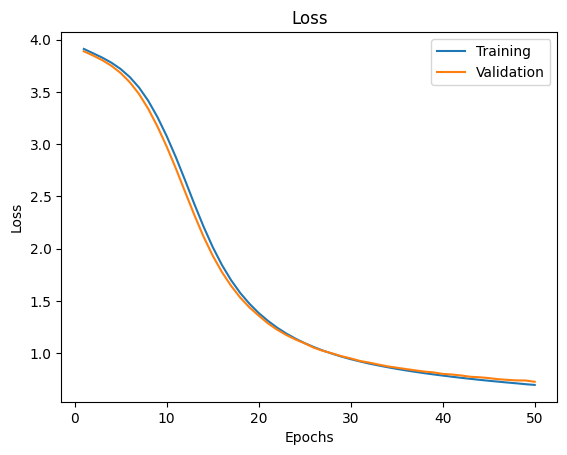

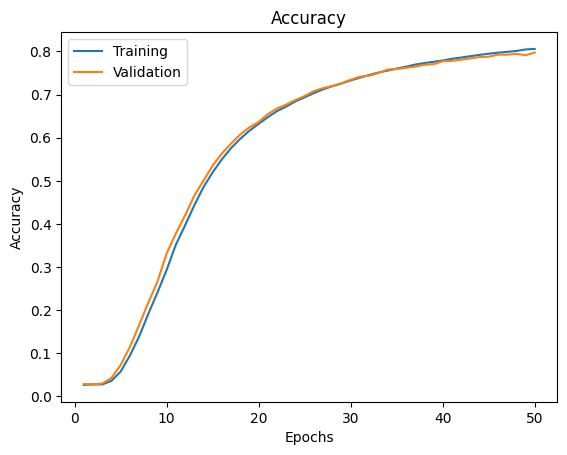

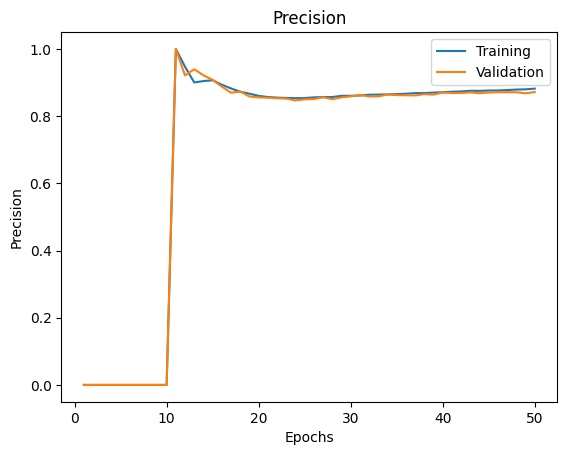

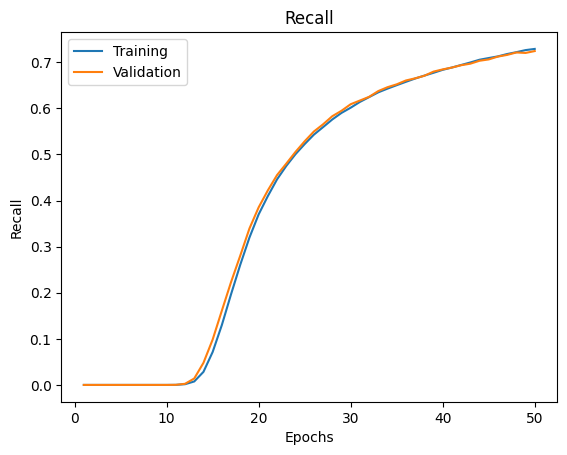

In [ ]:
plot_metrics(network_history, "Loss")
plot_metrics(network_history, "Accuracy")
plot_metrics(network_history, "Precision")
plot_metrics(network_history, "Recall")

This training history shows a neural network steadily improving its performance over the epochs. Initially, the model struggled, with low accuracy, zero true positives, and poor recall, indicating that it could not identify positive cases. However, the model started to make gradual progress from around Epoch 10, where we see the first true positives recorded.

As training progressed, accuracy, precision, and recall all improved, reflecting the model's increasing ability to differentiate between classes. By Epoch 25, accuracy had reached 69%, with further improvements in precision and recall, signifying fewer false negatives and false positives.



Since the evaluation metrics indicate solid generalization capabilities and strong performance—achieving 80.58% accuracy on the training set and 79.74% on the validation set, along with a low final loss of 0.6955—no additional models were evaluated.

### 1.1.3 Validate the model and comment on the results

please describe and interpret the evaluation procedure on a **validation set**, including initial comments on the generalization capability of your model (e.g. under/overfitting).


Based on the loss graph, both the training and validation loss decrease steadily and closely track each other throughout the 50 epochs. This pattern indicates that the model is not experiencing significant overfitting, as there is no substantial divergence between the training and validation loss. Instead, they follow a similar downward trend, which is a sign of good generalization capability.

The gradual decrease in loss without any sudden spikes or divergence suggests that the model is learning effectively without memorizing the training data excessively. The convergence of training and validation loss toward the end of the epochs also implies that the model has reached a stable state without signs of underfitting, as both losses have reduced to relatively low levels.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


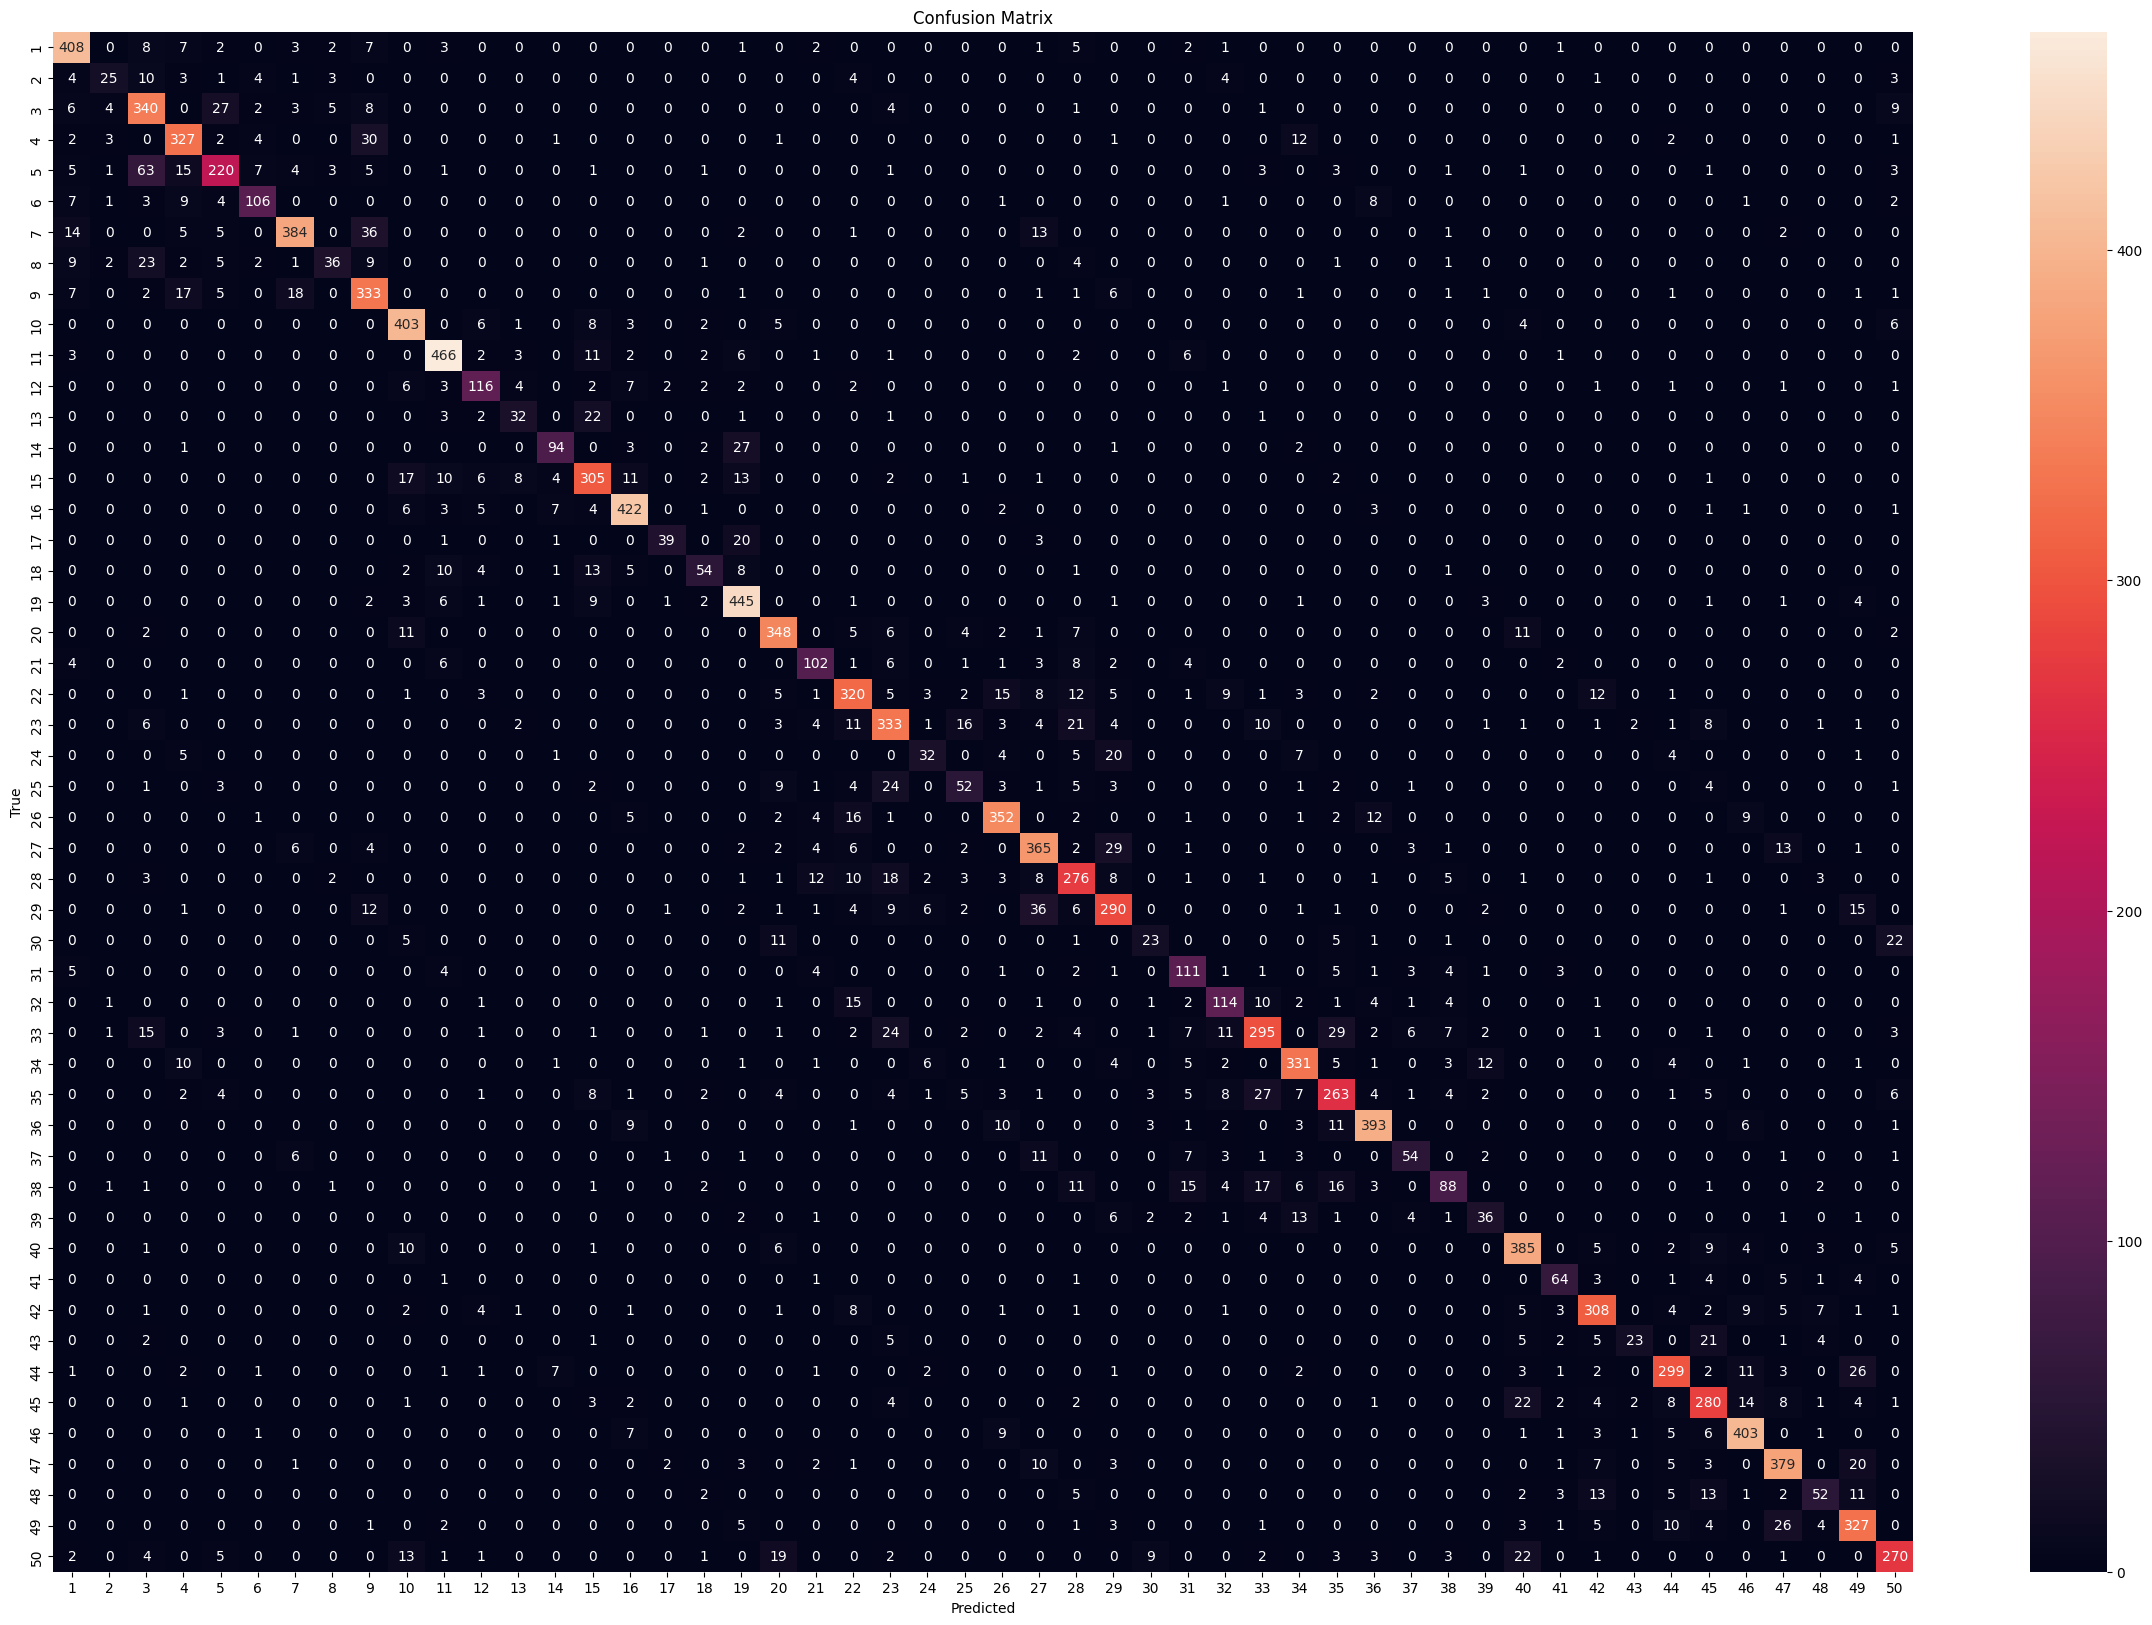

In [ ]:
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

labels = list(range(1, 51))

plt.figure(figsize=(30, 20))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
print(classification_report(y_true_classes, y_pred_classes))

              precision    recall  f1-score   support

           1       0.86      0.90      0.88       453
           2       0.64      0.40      0.49        63
           3       0.70      0.83      0.76       410
           4       0.80      0.85      0.82       386
           5       0.77      0.65      0.70       339
           6       0.83      0.74      0.78       143
           7       0.90      0.83      0.86       463
           8       0.69      0.38      0.49        96
           9       0.74      0.84      0.79       397
          10       0.84      0.92      0.88       438
          11       0.89      0.92      0.91       506
          12       0.75      0.77      0.76       151
          13       0.63      0.52      0.57        62
          14       0.80      0.72      0.76       130
          15       0.78      0.80      0.79       383
          16       0.88      0.93      0.90       456
          17       0.85      0.61      0.71        64
          18       0.70    

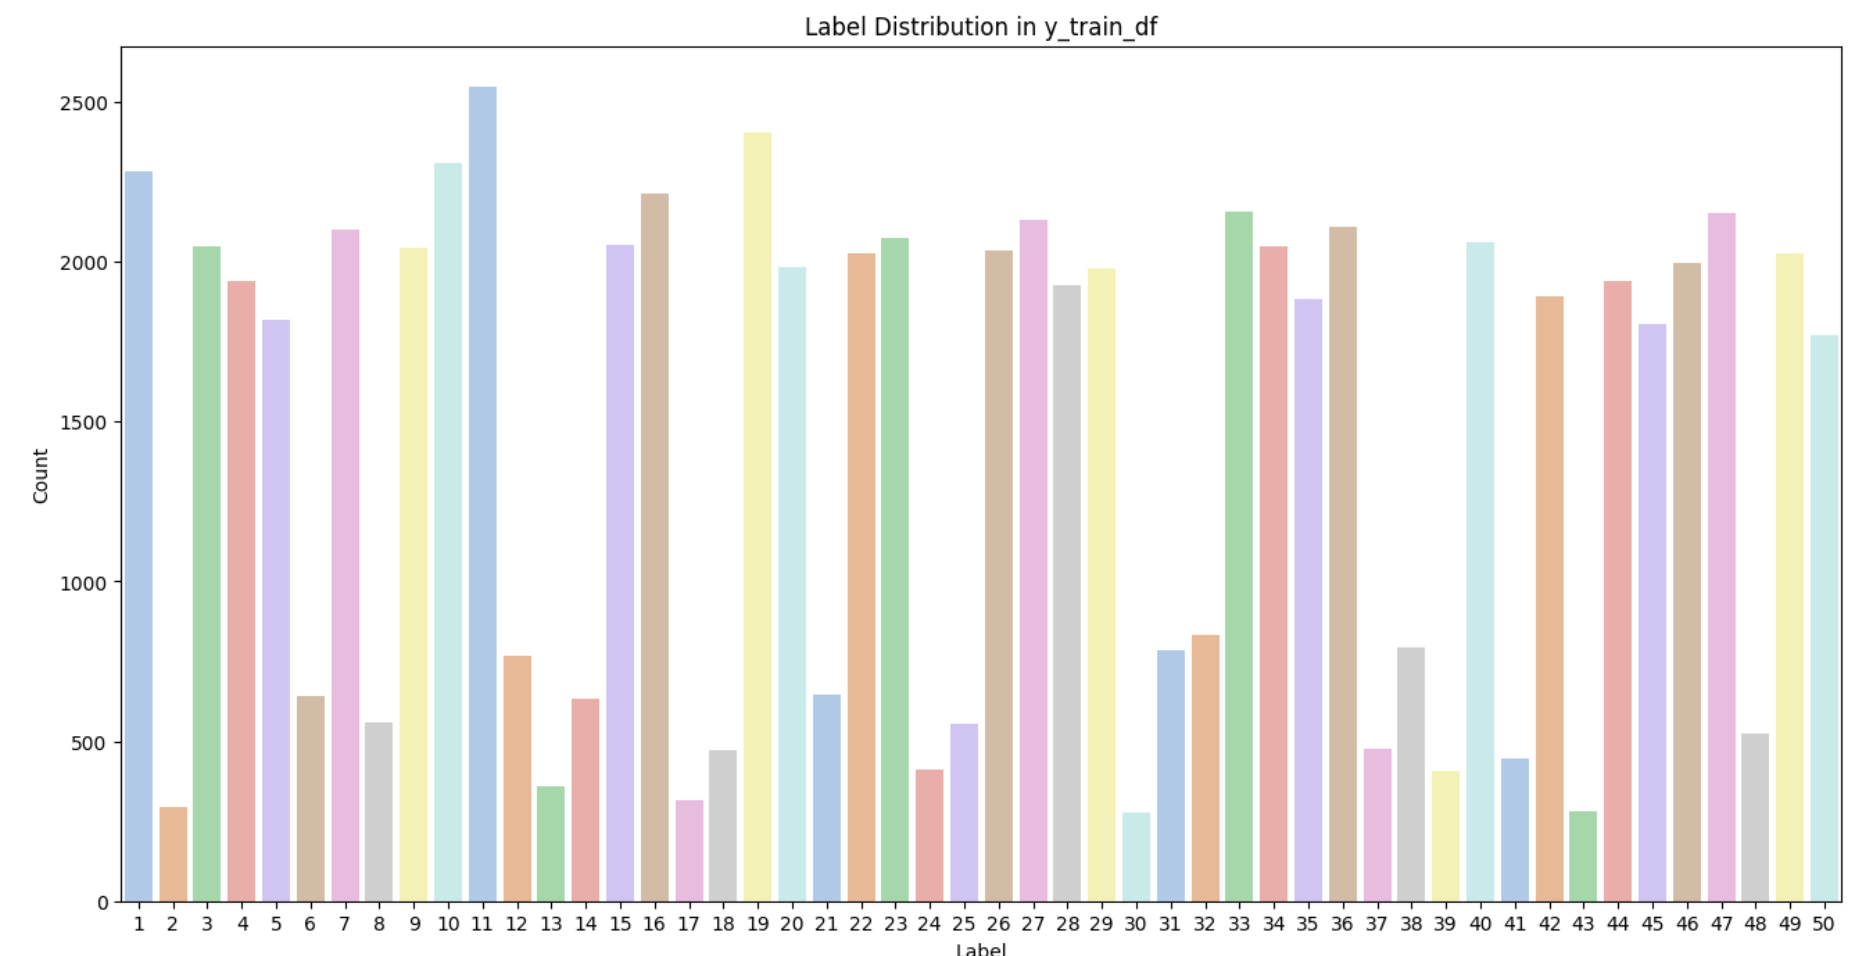

- **High Performance**: Classes such as 1, 10, 11, 16, 19, and 46 show strong performance with F1-scores above 0.85. These classes have both high precision and recall, suggesting that the model is correctly identifying and recalling these classes without much confusion.
- **Low Performance**: Some classes (e.g., 13, 24, 25, 30, 39, and 43) have lower F1-scores, with values as low as 0.10 for class 43. These classes have either low precision, recall, or both, indicating that the model struggles with them, possibly due to fewer examples in the dataset or higher overlap with other classes.

In confirmation of our previous hypotheses, the classes with lower performance—those the network struggles to recognize more—are indeed those with fewer samples. Conversely, the network performs better in recognizing classes with a greater amount of data.

## 1.2 Regularized Model

Replicate the structure of section 1.1 (including subsections 1.1.1, 1.1.2, 1.1.3 and guidelines), this time with the implementation and training of a regularized network.

Implement _at least_ one regularization technique of your choice.

The overall model architecture can be either identical or different with respect to the one presented in sec 1.1 (your choice).

### 1.2.1 Building the network

any description/comment about the procedure you followed in the choice of the network structure and hyperparameters goes here, together with consideration about the training/optimization procedure (e.g. loss/optimizer choice, final activations, loss functions, training metrics and training hyperparameters)

Initially, I tested a much more complex and deeper network, with twice as many layers, by duplicating each layer from the network described in section 1.1.1. The goal was to make the network deeper and more complex in order to increase the likelihood of overfitting on the training set. However, due to the complexity of the network, the training required too many resources, and even by increasing the epochs, the performance was poor. For this reason, I decided to maintain the same neural network architecture as outlined in section 1.1, keeping the same layers, number of neurons, loss function, and activation function.

However, I applied regularization techniques to enhance generalization. Specifically, I introduced a 20% dropout rate, applied during training to prevent overfitting by randomly dropping connections. The dropout layer is added after the first layer, allowing the initial layer to fully learn features without interference.


Additionally, I used L2 regularization, which applies a penalty proportional to the squared values of the weights (L2 = alpha * w^2). This regularization method helps constrain the weight values, reducing the risk of overfitting by penalizing large weights.


Upon reviewing the results from point 1.1.2, it appears that the network, even without regularization, already achieved strong generalization with no evidence of overfitting. Therefore, we hypothesize that with regularization, the model may learn more gradually. To accommodate this slower learning process, we have increased the number of epochs to 100, double the amount used in point 1.



I also implemented Early Stopping, ensuring that after the 20th epoch, training would halt if the validation loss failed to improve by at least 0.15

In [ ]:
x_train = np.load('/content/drive/MyDrive/Magistrale/2°anno/Advanced ML/Assignment 2/x_train.npy')
y_train = np.load('/content/drive/MyDrive/Magistrale/2°anno/Advanced ML/Assignment 2/y_train.npy')


def preprocess_mnist(x_train, y_train):
  x_train = x_train.reshape(x_train.shape[0], 28*39)
  x_train = x_train.astype('float32')
  x_train /= 255
  y_train = to_categorical(y_train)
  return x_train, y_train


x_train, y_train = preprocess_mnist(x_train, y_train)

print("X_train shape:", x_train.shape)
print("Y_train shape:", y_train.shape)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

X_train shape: (72247, 1092)
Y_train shape: (72247, 51)


In [ ]:
from keras.layers import Dropout

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=20, min_delta=0.15)

In [ ]:
from tensorflow.keras.regularizers import l1_l2, l1, l2
regularizer = l2(0.01)

In [ ]:
print('Input Shape =', dims)
print('Number classes = Output Shape =', nb_classes)

Input Shape = 1092
Number classes = Output Shape = 51


In [ ]:
model_reg = Sequential()
model_reg.add(Input((dims,)))
model_reg.add(Dense(1024, activation='relu', kernel_regularizer=regularizer, bias_regularizer=regularizer))
model_reg.add(Dense(512, activation='relu', kernel_regularizer=regularizer, bias_regularizer=regularizer))
model_reg.add(Dropout(0.20))
model_reg.add(Dense(256, activation='relu', kernel_regularizer=regularizer, bias_regularizer=regularizer))
model_reg.add(Dropout(0.20))
model_reg.add(Dense(128, activation='relu', kernel_regularizer=regularizer, bias_regularizer=regularizer))
model_reg.add(Dropout(0.20))
model_reg.add(Dense(64, activation='relu', kernel_regularizer=regularizer, bias_regularizer=regularizer))
model_reg.add(Dense(nb_classes))
model_reg.add(Activation('softmax'))

In [ ]:
model_reg.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 1024)                │       1,119,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 51)                  │           3,315 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 51)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,819,827 (6.94 MB)

 Trainable params: 1,819,827 (6.94 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
metrics_list = [
    'accuracy',
    kmetrics.FalseNegatives(name="fn"),
    kmetrics.FalsePositives(name="fp"),
    kmetrics.TrueNegatives(name="tn"),
    kmetrics.TruePositives(name="tp"),
    kmetrics.Precision(name="precision"),
    kmetrics.Recall(name="recall"),
]

In [ ]:
model_reg.compile(loss='categorical_crossentropy',
              optimizer=SGD(learning_rate=0.001),
              metrics=metrics_list)

In [ ]:
n_epochs = 100
network_history_reg = model_reg.fit(x_train, y_train, batch_size=128,
                            epochs=n_epochs, verbose=2, validation_data=(x_val, y_val), callbacks=[early_stopping])

Epoch 1/100
452/452 - 16s - 36ms/step - accuracy: 0.0245 - fn: 57797.0000 - fp: 0.0000e+00 - loss: 27.0646 - precision: 0.0000e+00 - recall: 0.0000e+00 - tn: 2889850.0000 - tp: 0.0000e+00 - val_accuracy: 0.0343 - val_fn: 14450.0000 - val_fp: 0.0000e+00 - val_loss: 26.8280 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_tn: 722500.0000 - val_tp: 0.0000e+00
Epoch 2/100
452/452 - 2s - 4ms/step - accuracy: 0.0329 - fn: 57797.0000 - fp: 0.0000e+00 - loss: 26.6177 - precision: 0.0000e+00 - recall: 0.0000e+00 - tn: 2889850.0000 - tp: 0.0000e+00 - val_accuracy: 0.0394 - val_fn: 14450.0000 - val_fp: 0.0000e+00 - val_loss: 26.3891 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_tn: 722500.0000 - val_tp: 0.0000e+00
Epoch 3/100
452/452 - 3s - 6ms/step - accuracy: 0.0386 - fn: 57797.0000 - fp: 0.0000e+00 - loss: 26.1854 - precision: 0.0000e+00 - recall: 0.0000e+00 - tn: 2889850.0000 - tp: 0.0000e+00 - val_accuracy: 0.0428 - val_fn: 14450.0000 - val_fp: 0.0000e+00 - val_loss: 2

In [ ]:
keras.saving.save_model(model_reg, "/content/drive/MyDrive/Magistrale/2°anno/Advanced ML/model_reg.keras")

### 1.2.2 Analyze and comment on the training results

Describe, visualize and interpret the training history and the resulting training dynamics.

Initially, the model's accuracy and recall were relatively low, with high false negatives, indicating that the network struggled to capture some positive cases. However, around epoch 50, there is a noticeable upward trend in validation accuracy and recall, suggesting that the network is learning to recognize patterns better.

I also tried other regularization techniques (L1 and L1_L2),  but these are the best results obtained with L2 regularization

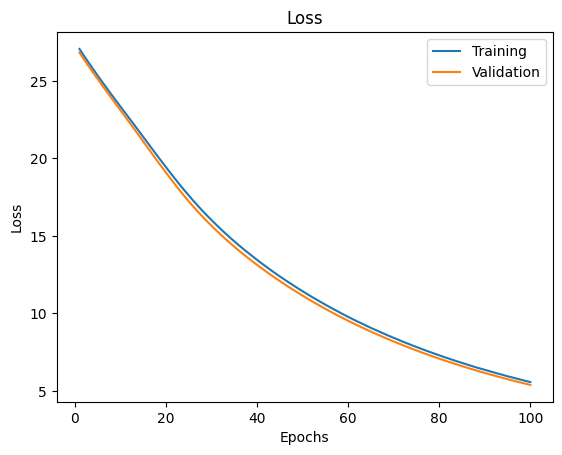

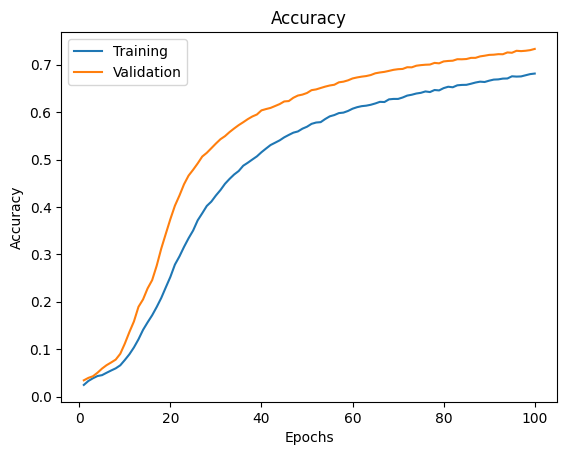

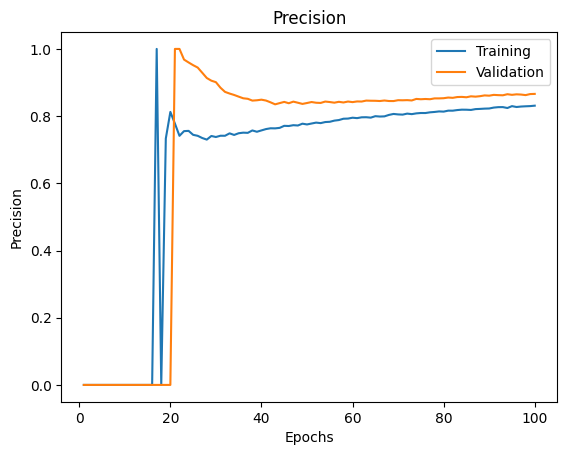

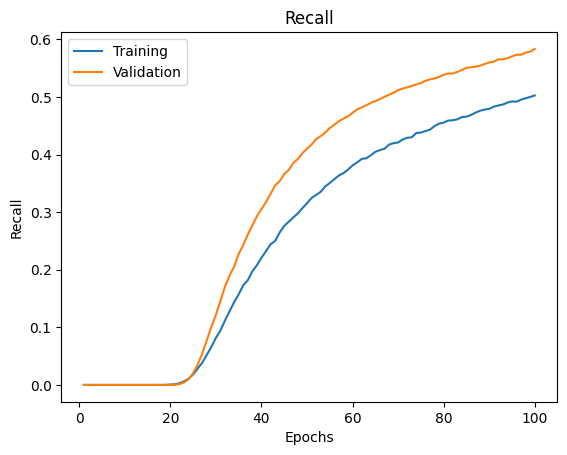

In [ ]:
plot_metrics(network_history_reg, "Loss")
plot_metrics(network_history_reg, "Accuracy")
plot_metrics(network_history_reg, "Precision")
plot_metrics(network_history_reg, "Recall")

In the first 20 epochs, there is significant oscillation, especially in the training **precision**. This behavior could be due to the model adjusting weights dramatically, leading to fluctuations in precision, possibly caused by the regularization applied to the network (Dropout and L2), which may 'slow down' the learning process.

### 1.2.3 Validate the model and comment on the results

please describe and interpret the evaluation procedure on a **validation set**, including initial comments on the generalization capability of your model (e.g. under/overfitting).


The loss for both training and validation decreases consistently as the epochs progress, indicating that the model is learning effectively and improving its performance on both the training and validation sets. The close alignment between the training and validation loss curves suggests that the model is generalizing well without significant overfitting, as there is minimal divergence between the two lines.

By the end of the training, the loss values for both sets are still decreasing, suggesting that further training might continue to improve performance. In fact, early stopping did not occur, so the validation loss continued to decrease. I conducted additional experiments, not included here due to the lengthy runtime of the code, where an accuracy of 80% was achieved after 200 iterations.

The validation accuracy is consistently higher than the training accuracy. **Dropout and L2** potentially limiting the model's ability to achieve high accuracy on the training set while improving generalization on the validation set.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
y_pred_reg = model_reg.predict(x_val)
y_pred_classes_reg = np.argmax(y_pred_reg, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


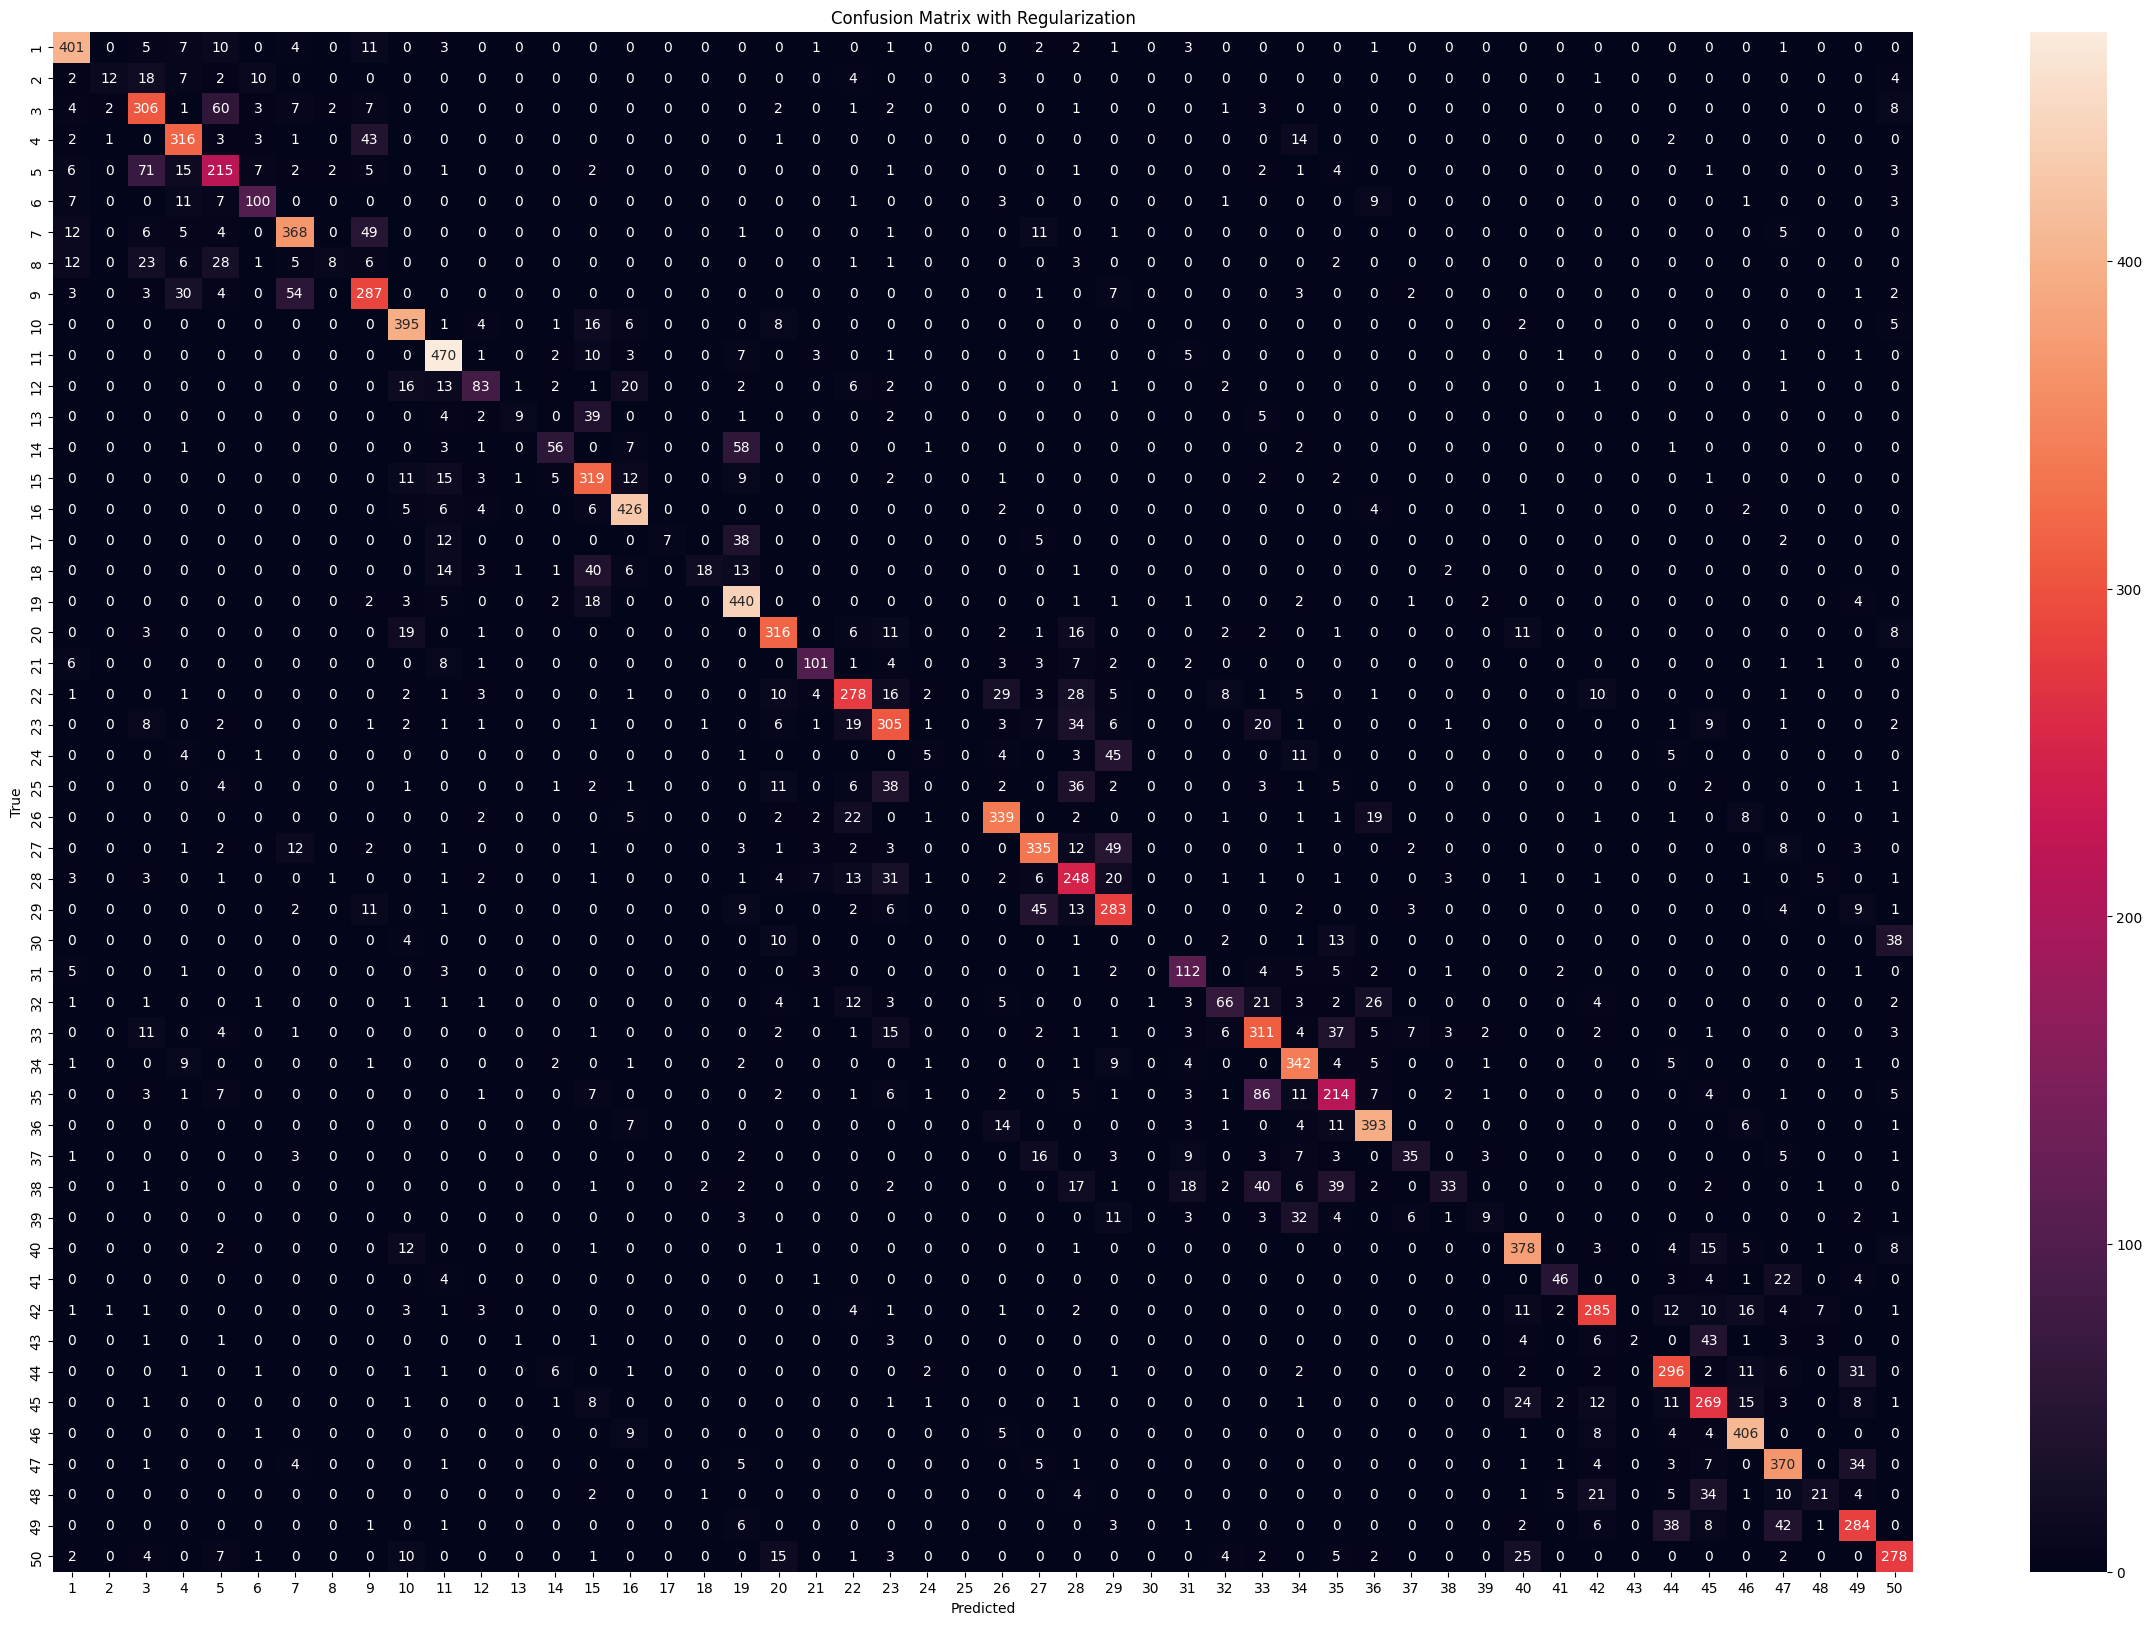

In [ ]:
conf_matrix_reg = confusion_matrix(y_true_classes, y_pred_classes_reg)

labels = list(range(1, 51))

plt.figure(figsize=(30, 20))
sns.heatmap(conf_matrix_reg, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix with Regularization')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
print(classification_report(y_true_classes, y_pred_classes_reg))

              precision    recall  f1-score   support

           1       0.85      0.89      0.87       453
           2       0.75      0.19      0.30        63
           3       0.65      0.75      0.70       410
           4       0.76      0.82      0.79       386
           5       0.59      0.63      0.61       339
           6       0.78      0.70      0.74       143
           7       0.79      0.79      0.79       463
           8       0.62      0.08      0.15        96
           9       0.67      0.72      0.70       397
          10       0.81      0.90      0.85       438
          11       0.82      0.93      0.87       506
          12       0.72      0.55      0.62       151
          13       0.69      0.15      0.24        62
          14       0.71      0.43      0.54       130
          15       0.67      0.83      0.74       383
          16       0.84      0.93      0.89       456
          17       1.00      0.11      0.20        64
          18       0.82    

Classes 2, 8, 13, 24, 25, 30, 39, and 43 have very low F1-scores, likely due to fewer instances. These classes have both low precision and recall, possibly indicating difficulty in identifying their features.
In particular, classes like 30 and 43 have an F1-score of 0.00, indicating that the model is not correctly predicting these classes at all.

Classes like 1, 4, 7, 10, 11, 16, 19, 26, 34, 36, and 46 have high F1-scores (around 0.80 and above), indicating that the model is performing well in identifying these classes with both high precision and recall.
For example, class 11 achieved a strong F1-score of 0.87 with high precision (0.81) and recall (0.93), meaning the model is accurately and consistently predicting this class.

The macro average (average over all classes, without considering support) has lower values for precision (0.67), recall (0.59), and F1-score (0.60). This difference suggests that performance is skewed by certain classes with higher support, and some classes are performing poorly.

## 1.3. Compare the performances of the two models (non-regularized and regularized) on the provided test set, visualize and comment on theresults

Visualize, describe and interpret the evaluation procedure and results on the provided test set, with a focus on the generalization capability of your models.



In [ ]:
x_test = np.load('/content/drive/MyDrive/Magistrale/2°anno/Advanced ML/Assignment 2/x_test.npy')
y_test = np.load('/content/drive/MyDrive/Magistrale/2°anno/Advanced ML/Assignment 2/y_test.npy')
x_test, y_test = preprocess_mnist(x_test, y_test)

print("X_test shape:", x_test.shape)
print("Y_test shape:", y_test.shape)

X_test shape: (24083, 1092)
Y_test shape: (24083, 51)


In [ ]:
y_pred = model.predict(x_test)
y_pred_reg = model_reg.predict(x_test)

y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_classes_reg = np.argmax(y_pred_reg, axis=1)

y_true_classes = np.argmax(y_test, axis=1)

753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


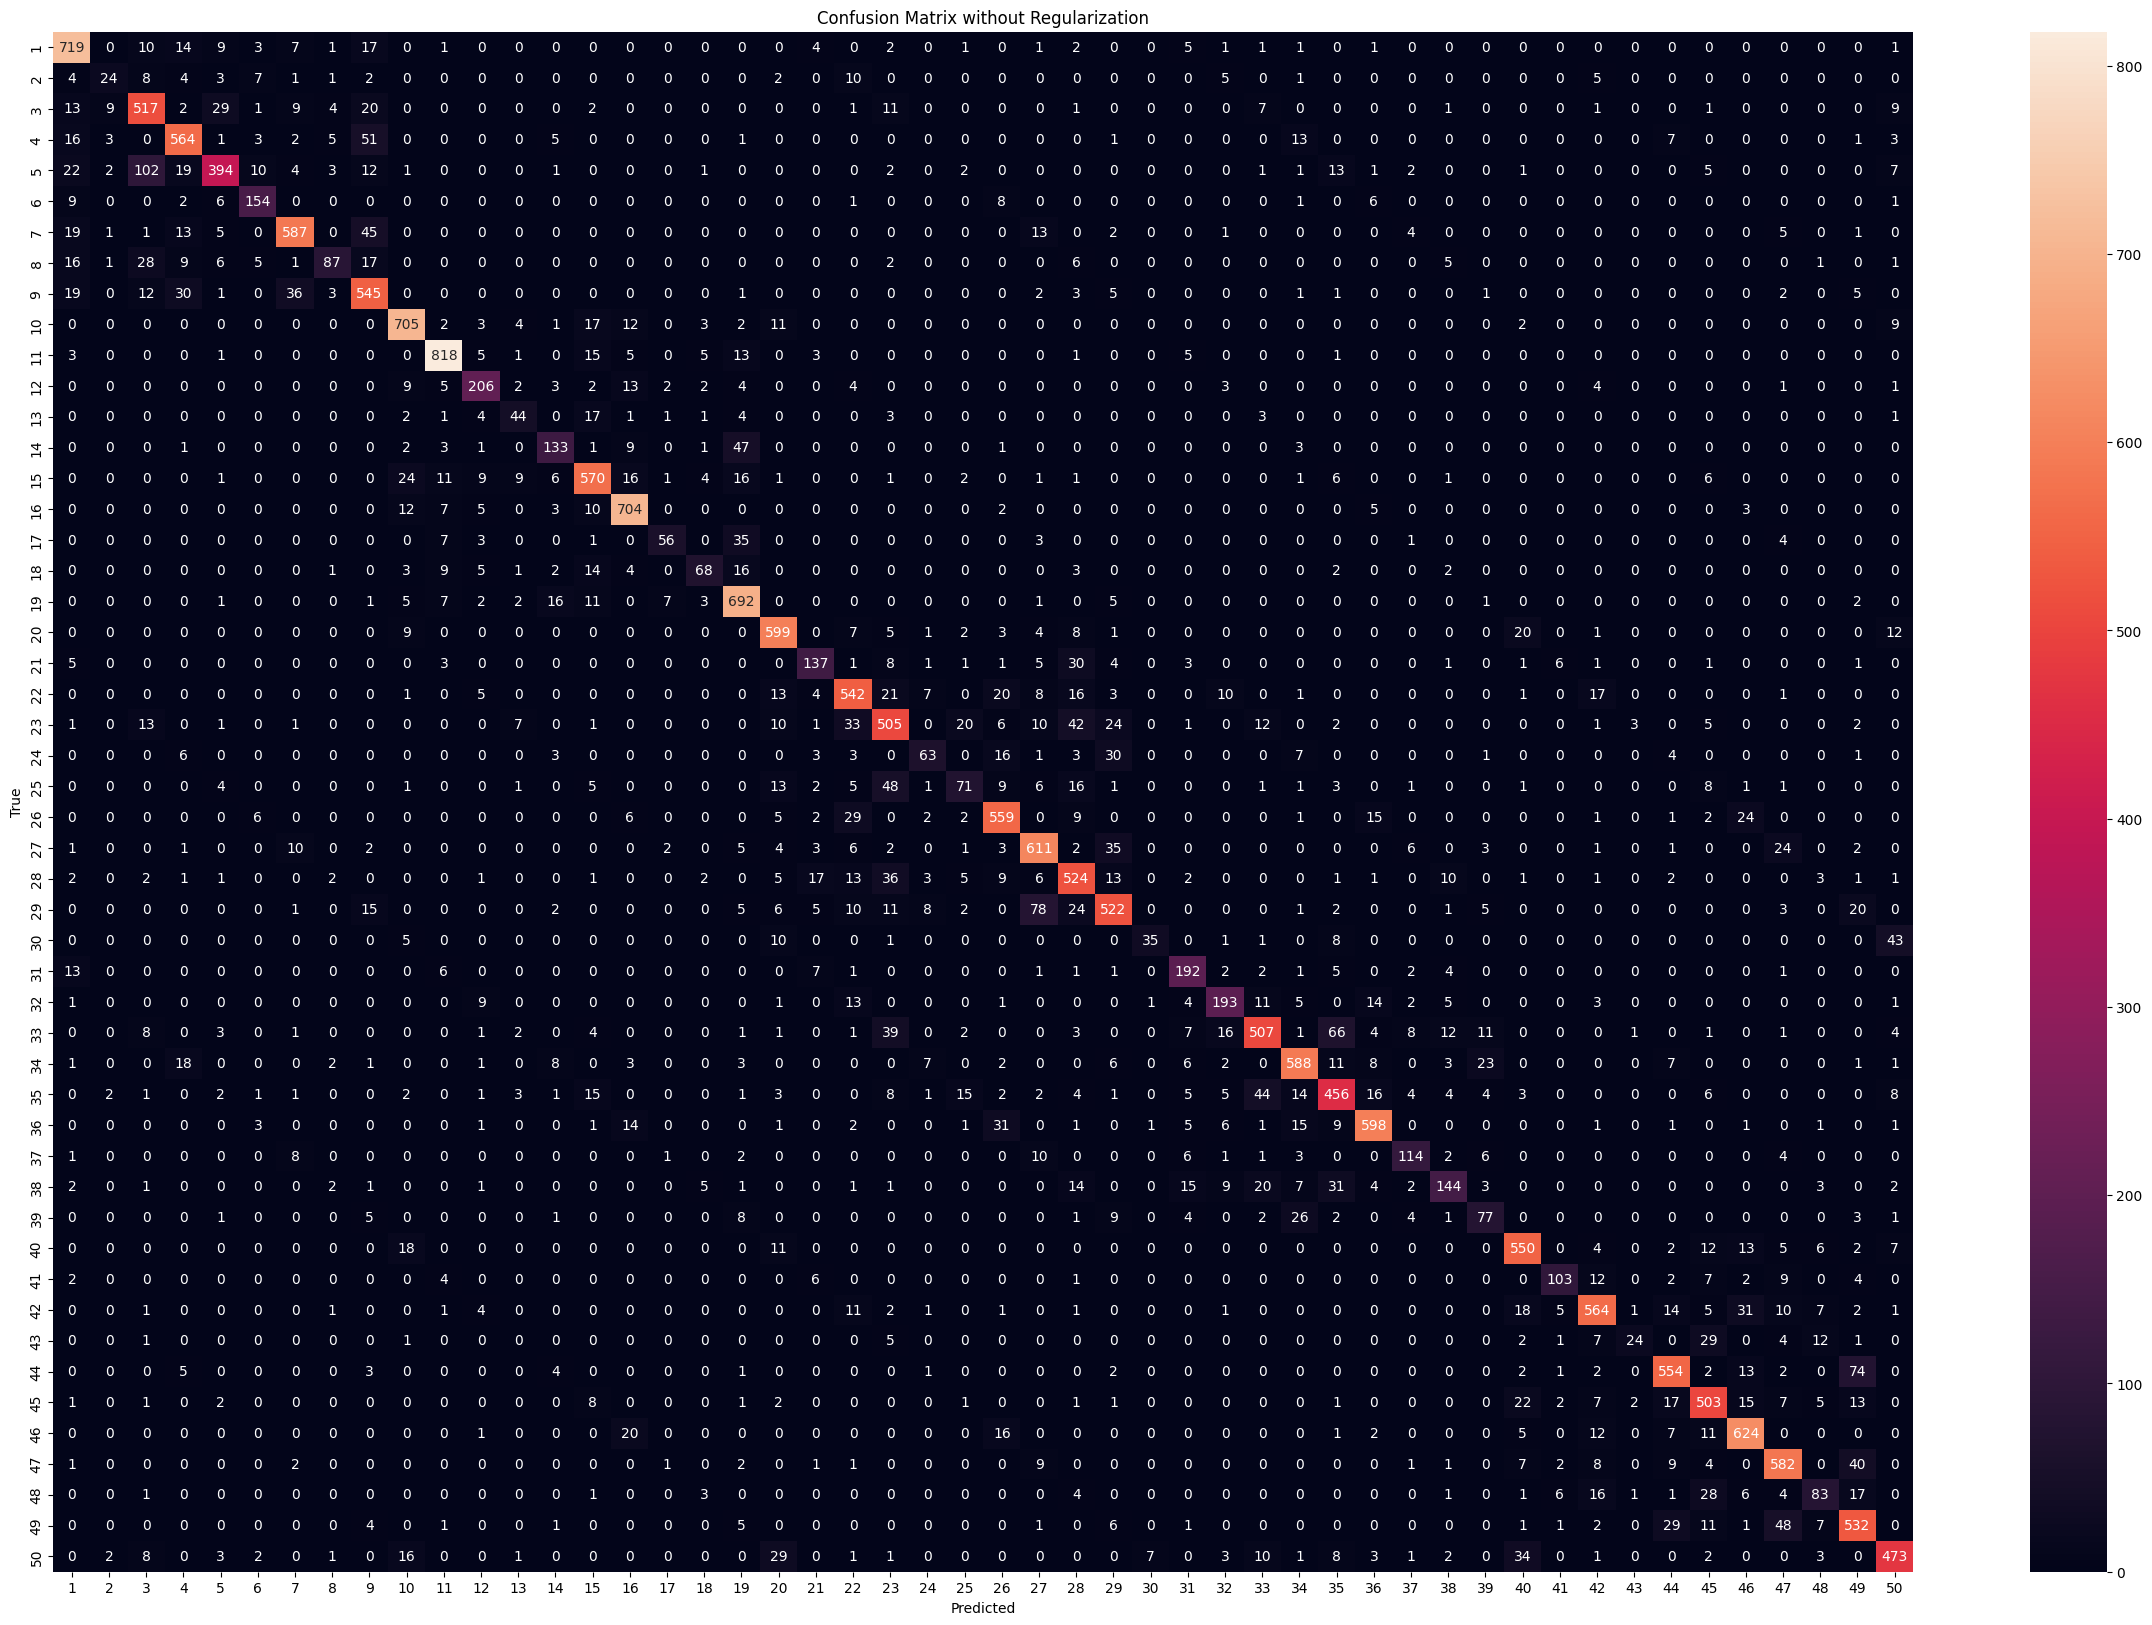

In [ ]:
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

labels = list(range(1, 51))

plt.figure(figsize=(30, 20))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix without Regularization')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
print(classification_report(y_true_classes, y_pred_classes))

              precision    recall  f1-score   support

           1       0.83      0.90      0.86       801
           2       0.55      0.31      0.40        77
           3       0.72      0.81      0.76       638
           4       0.82      0.83      0.83       676
           5       0.83      0.65      0.73       606
           6       0.79      0.82      0.80       188
           7       0.87      0.84      0.86       697
           8       0.77      0.47      0.58       185
           9       0.74      0.82      0.77       667
          10       0.86      0.91      0.89       771
          11       0.92      0.93      0.93       876
          12       0.77      0.79      0.78       261
          13       0.57      0.54      0.55        82
          14       0.70      0.66      0.68       202
          15       0.82      0.83      0.82       687
          16       0.87      0.94      0.90       751
          17       0.79      0.51      0.62       110
          18       0.69    

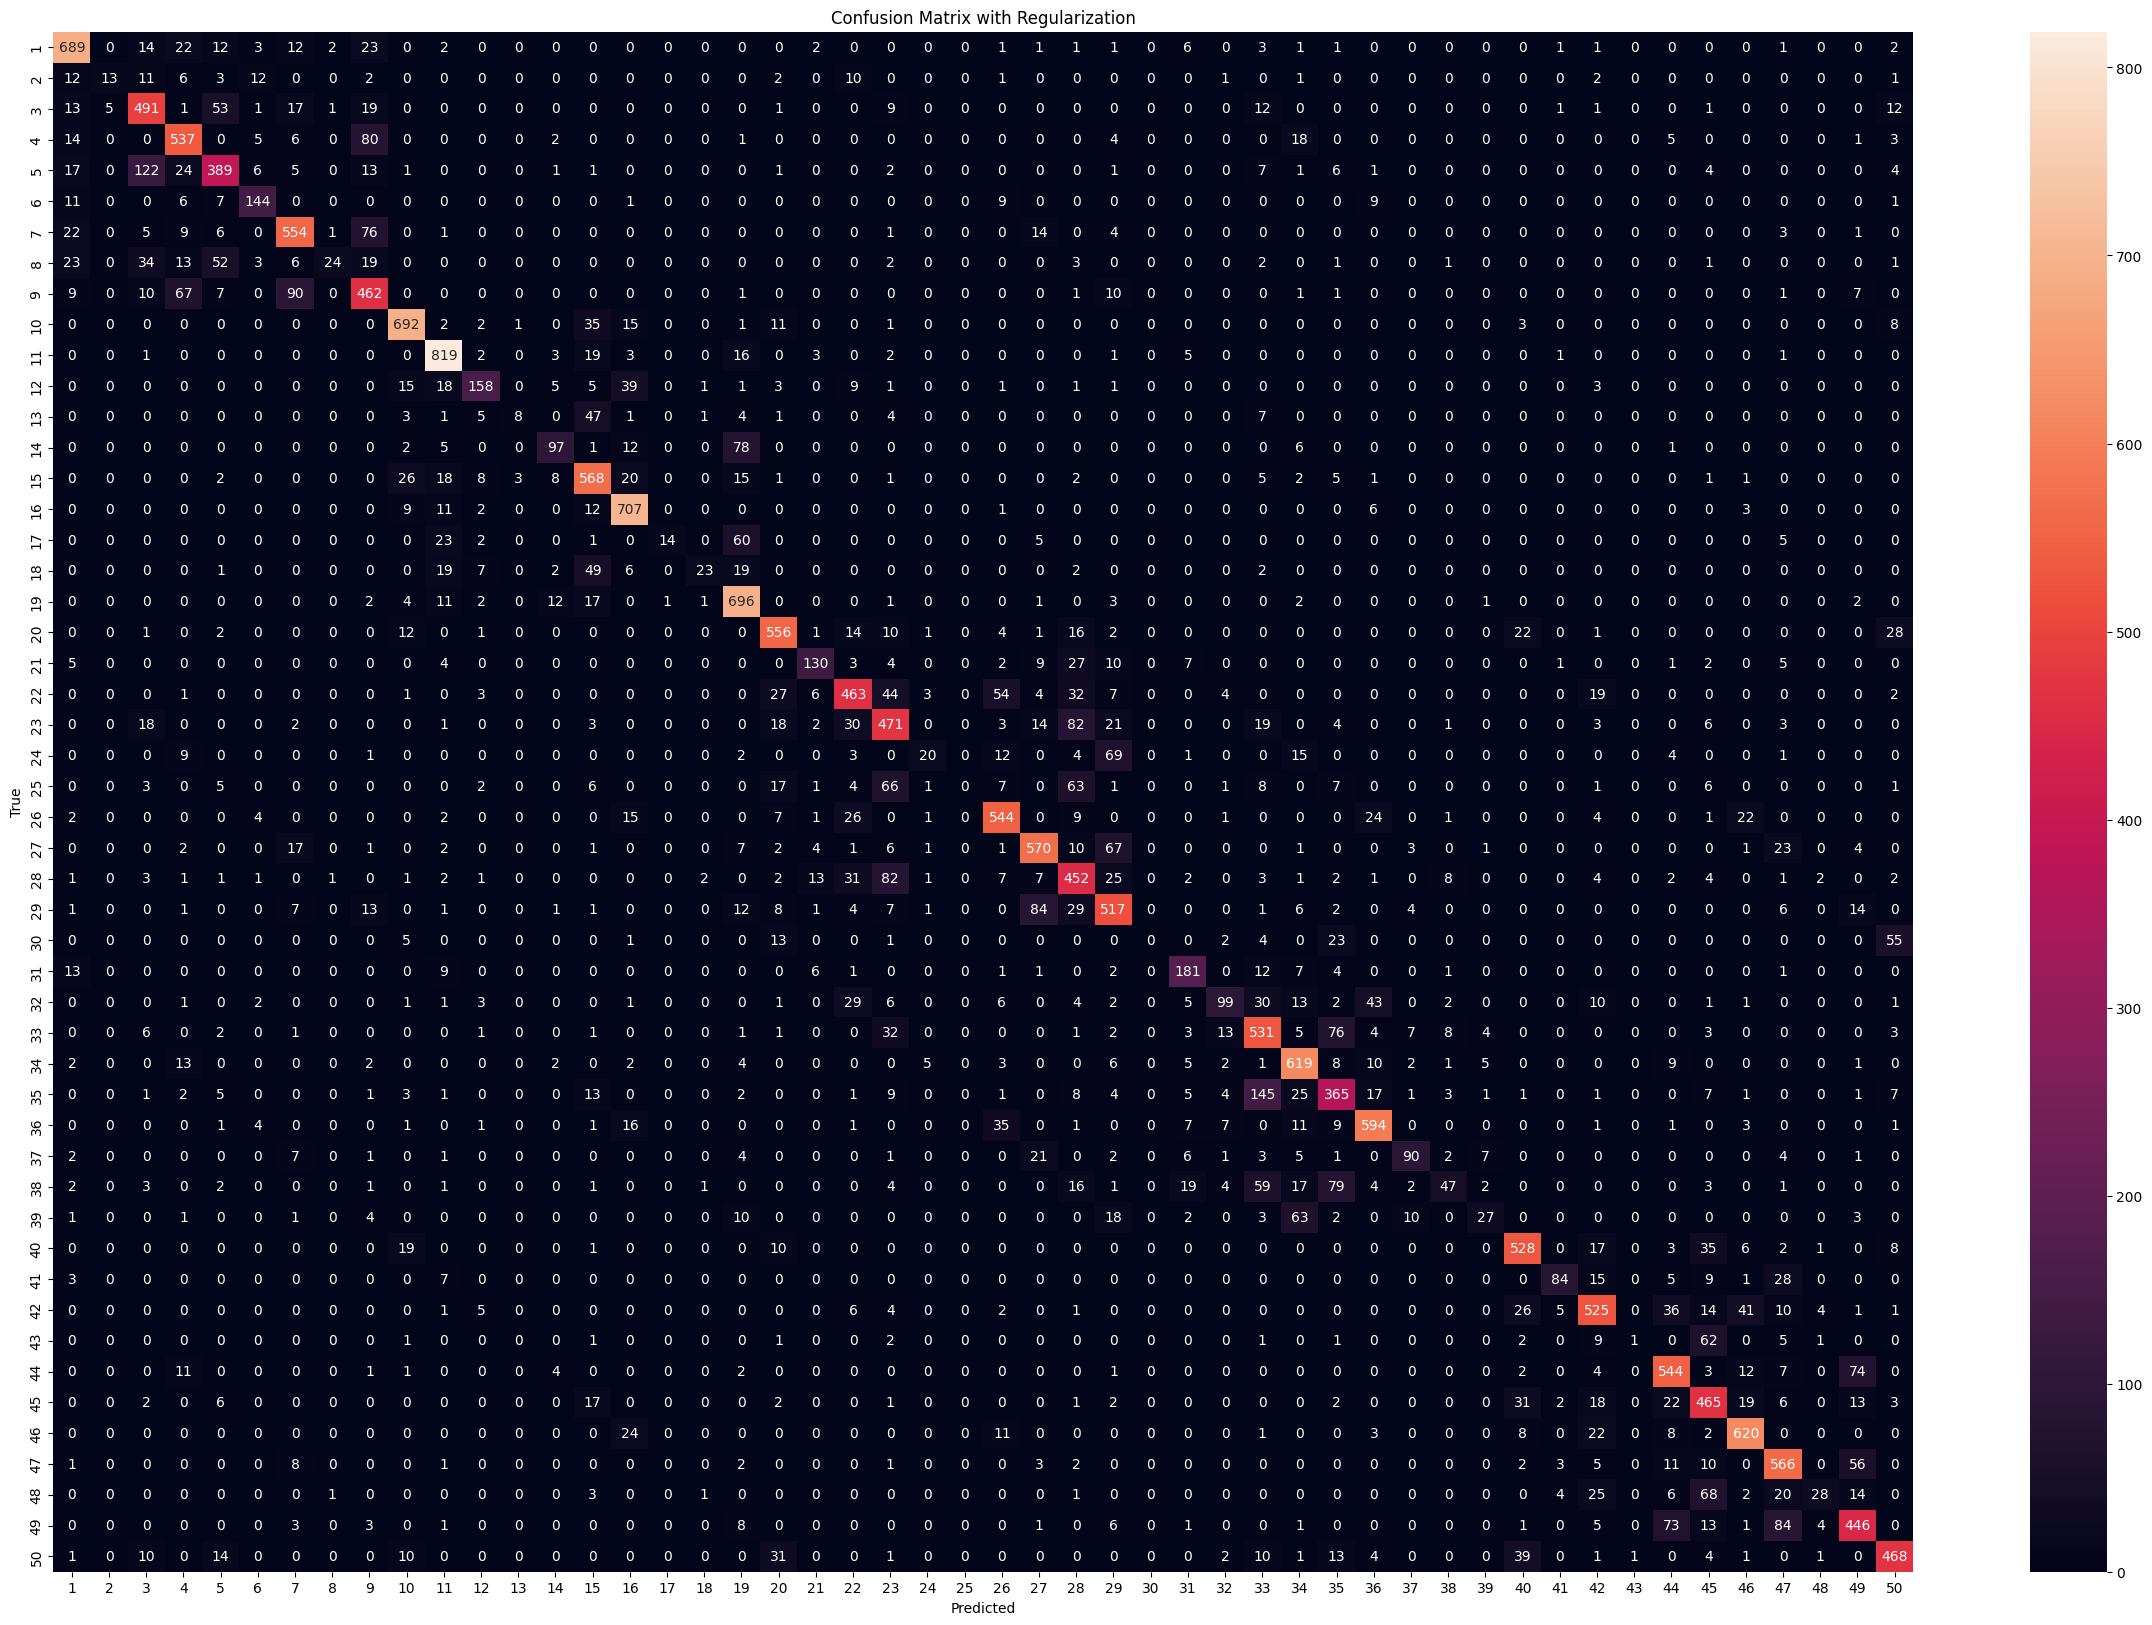

In [ ]:
conf_matrix_reg = confusion_matrix(y_true_classes, y_pred_classes_reg)

labels = list(range(1, 51))

plt.figure(figsize=(30, 20))
sns.heatmap(conf_matrix_reg, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix with Regularization')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
print(classification_report(y_true_classes, y_pred_classes_reg))

              precision    recall  f1-score   support

           1       0.82      0.86      0.84       801
           2       0.72      0.17      0.27        77
           3       0.67      0.77      0.72       638
           4       0.74      0.79      0.77       676
           5       0.68      0.64      0.66       606
           6       0.78      0.77      0.77       188
           7       0.75      0.79      0.77       697
           8       0.80      0.13      0.22       185
           9       0.64      0.69      0.66       667
          10       0.86      0.90      0.88       771
          11       0.85      0.93      0.89       876
          12       0.77      0.61      0.68       261
          13       0.67      0.10      0.17        82
          14       0.71      0.48      0.57       202
          15       0.71      0.83      0.76       687
          16       0.82      0.94      0.88       751
          17       0.93      0.13      0.22       110
          18       0.77    

Based on the results obtained and analyzed during the training and the validation phases, what were your (rather _personal_) expectations with respect to the performances of your models on a blind external test set?

What are the differences between results on the validation set and the actual result on the test set (if any)? What could have caused them? Briefly motivate your answer.

After the comparison, what is the overall "best" model? Why?

For the model that you consider the "best", what are the major sources of error? Are there any classes/labels (or data samples in general) where the model is struggling the most? Why?

The network without regularization has a higher macro average for precision, recall, and F1-score (0.76, 0.70, 0.72) compared to the second (0.68, 0.59, 0.60), indicating a greater ability to distinguish between different classes.

The first network achieves a higher F1-score for several classes, especially for highly represented classes such as 1, 10, and 11. Some classes with low support (such as class 2 and 13) have very low F1-scores in both networks, but the network with regularization shows also particularly low scores for certain classes with moderate support, such as class 8 and 48, suggesting difficulties with these classes.

The poorer performance of the network with regularization is likely due to the regularization techniques that were not entirely necessary, as the first network already had strong generalization capabilities.

As mentioned earlier, both models struggled to correctly identify certain classes due to the limited data available for them in the dataset and Dropout and L2 (in the second model) potentially limiting the model's ability to achieve high accuracy on the training set while improving generalization on the validation set.

However, with the applied regularization techniques, I am confident that, given additional epochs and extended training time, the network could achieve even greater generalization capabilities compared to the version without regularization.

# 2. The development of a simple auto-encoder model  [Mandatory]
Implement a fully-connected AutoEncoder architecuture, with a **compression factor** (ratio between input size and smallest encoding size) in the **range [20-30]**.


Visually investigate the reconstruction abilities of such an architecture, e.g. comparing a few inputs and outputs (reconstructed inputs) of the model (as seen in class).

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Input, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD
from keras.losses import BinaryCrossentropy
import keras.metrics as kmetrics
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
x_train = np.load('/content/drive/MyDrive/Magistrale/2°anno/Advanced ML/Assignment 2/x_train.npy')
y_train = np.load('/content/drive/MyDrive/Magistrale/2°anno/Advanced ML/Assignment 2/y_train.npy')
x_test = np.load('/content/drive/MyDrive/Magistrale/2°anno/Advanced ML/Assignment 2/x_test.npy')
y_test = np.load('/content/drive/MyDrive/Magistrale/2°anno/Advanced ML/Assignment 2/y_test.npy')

In [ ]:
print("X_train shape:", x_train.shape)
print("Y_train shape:", y_train.shape)
print("X_test shape:", x_test.shape)
print("Y_test shape:", y_test.shape)

X_train shape: (72247, 28, 39)
Y_train shape: (72247,)
X_test shape: (24083, 28, 39)
Y_test shape: (24083,)


In [ ]:
x_train, y_train = preprocess_mnist(x_train, y_train)
x_test, y_test = preprocess_mnist(x_test, y_test)

In [ ]:
print("X_train shape:", x_train.shape)
print("Y_train shape:", y_train.shape)
print("X_test shape:", x_test.shape)
print("Y_test shape:", y_test.shape)

X_train shape: (72247, 1092)
Y_train shape: (72247, 51)
X_test shape: (24083, 1092)
Y_test shape: (24083, 51)


## 2.1 Building the network

note: although not strictly required, monitoring the training dynamics and performance evaluation is suggested for the autoencoder model.

In [ ]:
input = x_train.shape[1]
print('Input Shape =', input)

encoding_dim = 42
print('Compression Factor =', input/encoding_dim)

Input Shape = 1092
Compression Factor = 26.0



This autoencoder consists of an encoder and a decoder. It processes an input of 1092 features, compresses it into a lower-dimensional latent space, and reconstructs the original input.

**Encoder**:
- **Input Layer**: Takes input of shape `(1092,)`.
- **Downsampling Hidden Layers**: These layers progressively reduce the dimensions of the input:
  1. Dense layer with 512 units and ReLU activation.
  2. Dense layer with 256 units and ReLU activation.
  3. Dense layer with 128 units and ReLU activation.
  4. Dense layer with 64 units and ReLU activation.
- **Latent Layer**: Dense layer with `encoding_dim` (42) units and ReLU activation, representing the compressed latent space.

**Decoder**:
- **Upsampling Hidden Layers**: These layers progressively reconstruct the original input from the latent representation:
  1. Dense layer with 64 units and ReLU activation.
  2. Dense layer with 128 units and ReLU activation.
  3. Dense layer with 256 units and ReLU activation.
  4. Dense layer with 512 units and ReLU activation.
- **Output Layer**: Dense layer with 1092 units and sigmoid activation, which reconstructs the original input.



In [ ]:
activation = "relu"

input = Input(shape=(1092,))

# encoder
downsampling_hidden_1 = Dense(512, activation = activation, name = "downsampling_hidden_1")(input)
downsampling_hidden_2 = Dense(256, activation=activation, name="downsampling_hidden_2")(downsampling_hidden_1)
downsampling_hidden_3 = Dense(128, activation=activation, name="downsampling_hidden_3")(downsampling_hidden_2)
downsampling_hidden_4 = Dense(64, activation=activation, name="downsampling_hidden_4")(downsampling_hidden_3)

encoded = Dense(encoding_dim, activation=activation , name = "latent")(downsampling_hidden_4)

# decoder
upsampling_hidden_1 = Dense(64, activation = activation, name = "upsampling_hidden_1")(encoded)
upsampling_hidden_2 = Dense(128, activation = activation, name = "upsampling_hidden_2")(upsampling_hidden_1)
upsampling_hidden_3 = Dense(256, activation=activation, name="upsampling_hidden_3")(upsampling_hidden_2)
upsampling_hidden_4 = Dense(512, activation=activation, name="upsampling_hidden_4")(upsampling_hidden_3)

decoded = Dense(1092, activation='sigmoid', name = "decoder")(upsampling_hidden_4)

autoencoder = Model(input, decoded)

autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1092)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ downsampling_hidden_1 (Dense)        │ (None, 512)                 │         559,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ downsampling_hidden_2 (Dense)        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ downsampling_hidden_3 (Dense)        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ downsampling_hidden_4 (Dense)        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ latent (Dense)                       │ (None, 42)                  │           2,730 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ upsampling_hidden_1 (Dense)          │ (None, 64)                  │           2,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ upsampling_hidden_2 (Dense)          │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ upsampling_hidden_3 (Dense)          │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ upsampling_hidden_4 (Dense)          │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder (Dense)                      │ (None, 1092)                │         560,196 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,470,702 (5.61 MB)

 Trainable params: 1,470,702 (5.61 MB)

 Non-trainable params: 0 (0.00 B)

### 2.1.1 Encoder e Decoder

In [ ]:
encoder_model = Model(input, encoded)
encoder_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1092)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ downsampling_hidden_1 (Dense)        │ (None, 512)                 │         559,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ downsampling_hidden_2 (Dense)        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ downsampling_hidden_3 (Dense)        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ downsampling_hidden_4 (Dense)        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ latent (Dense)                       │ (None, 42)                  │           2,730 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 734,826 (2.80 MB)

 Trainable params: 734,826 (2.80 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
decoder_model = Model(encoded, decoded)
decoder_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ keras_tensor_5CLONE (InputLayer)     │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ upsampling_hidden_1 (Dense)          │ (None, 64)                  │           2,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ upsampling_hidden_2 (Dense)          │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ upsampling_hidden_3 (Dense)          │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ upsampling_hidden_4 (Dense)          │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder (Dense)                      │ (None, 1092)                │         560,196 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 735,876 (2.81 MB)

 Trainable params: 735,876 (2.81 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
autoencoder.compile(optimizer="adam", loss='binary_crossentropy', metrics = ["mse"])
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1092)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ downsampling_hidden_1 (Dense)        │ (None, 512)                 │         559,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ downsampling_hidden_2 (Dense)        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ downsampling_hidden_3 (Dense)        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ downsampling_hidden_4 (Dense)        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ latent (Dense)                       │ (None, 42)                  │           2,730 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ upsampling_hidden_1 (Dense)          │ (None, 64)                  │           2,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ upsampling_hidden_2 (Dense)          │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ upsampling_hidden_3 (Dense)          │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ upsampling_hidden_4 (Dense)          │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder (Dense)                      │ (None, 1092)                │         560,196 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,470,702 (5.61 MB)

 Trainable params: 1,470,702 (5.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
network_history = autoencoder.fit(x_train,x_train,
                epochs=100,
                batch_size=1024,
                shuffle=True,
                validation_split=0.1)

Epoch 1/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - loss: 0.4761 - mse: 0.1283 - val_loss: 0.3546 - val_mse: 0.0852
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.3483 - mse: 0.0829 - val_loss: 0.3183 - val_mse: 0.0726
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.3127 - mse: 0.0707 - val_loss: 0.2966 - val_mse: 0.0652
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.2907 - mse: 0.0630 - val_loss: 0.2734 - val_mse: 0.0571
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2695 - mse: 0.0556 - val_loss: 0.2560 - val_mse: 0.0509
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2555 - mse: 0.0506 - val_loss: 0.2450 - val_mse: 0.0471
Epoch 7/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2419 - mse: 0.0459 - val_loss: 0.2347 - val_mse: 0.0435
Epoch 8/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2328 - mse: 0.0427 - val_loss: 0.2305 - val_mse: 0.0419
Epoch 9/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss:

During the training of the autoencoder, we observe a consistent decline in both training and validation loss, especially during the initial epochs. Starting from a higher initial value, the loss and mean squared error (**MSE**) decrease steadily, indicating that the model is learning to reconstruct the input effectively.

The model reaches a plateau around epoch 65, where the decrease in validation loss becomes minimal, suggesting convergence. At this point, additional training might yield diminishing returns, as the loss reduction is minimal.

Overall, the model appears to have reached a stable performance.

### 2.1.2 Evaluetion of performance

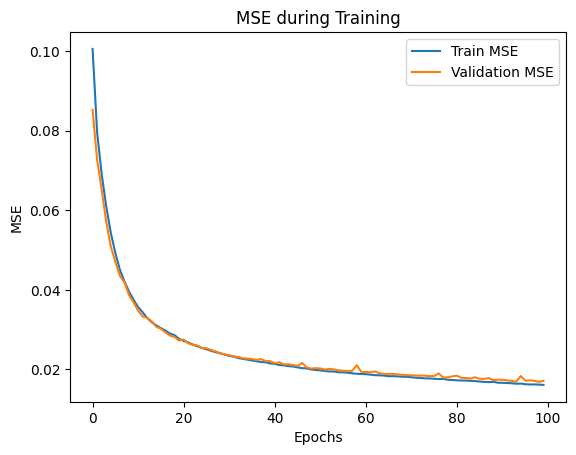

In [ ]:
plt.plot(network_history.history['mse'], label='Train MSE')
plt.plot(network_history.history['val_mse'], label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.title('MSE during Training')
plt.show()

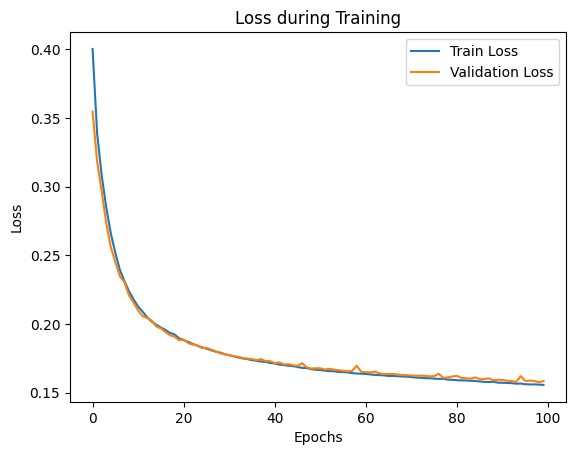

In [ ]:
plt.plot(network_history.history['loss'], label='Train Loss')
plt.plot(network_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss during Training')
plt.show()

From the loss graph, we observe some oscillations in the validation loss, which could be attributed to the complexity and variability of the data. However, the validation loss also appears to decrease along with the training loss, although at a slightly slower rate.

## 2.2 Visually Inspecting the results

Investigate the reconstruction capabilities of autoencoders by comparing (in a multi-column plot) the visual representation of some input data (5 to 10 samples) with the reconstruction of such samples (output of the autoencoder).

753/753 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


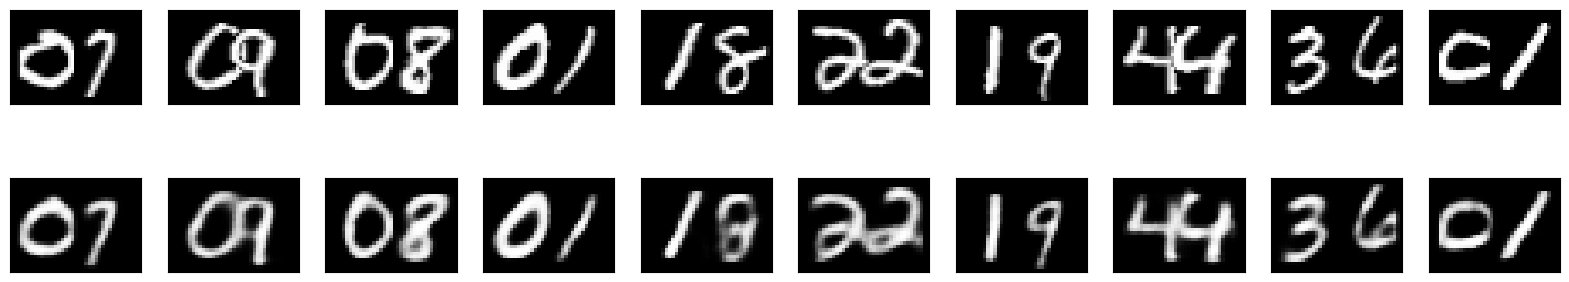

In [ ]:
x_selected = x_test
encoded_imgs = encoder_model.predict(x_selected)
decoded_imgs = decoder_model.predict(encoded_imgs)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_selected[i].reshape(28, 39))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 39))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

As shown in the images, the model is able to reconstruct the obtained representations quite faithfully.

## 2.3 Generate new samples

Starting from random encodings, generate $N$ ($N \in [10,20]$) new samples, and make some comments about the quality and distribution of the generated samples.

By generating samples using random values, the numbers produced by the decoder cannot be accurately identified, likely because it is highly unlikely that a distribution similar to the one generated by the encoder is produced.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


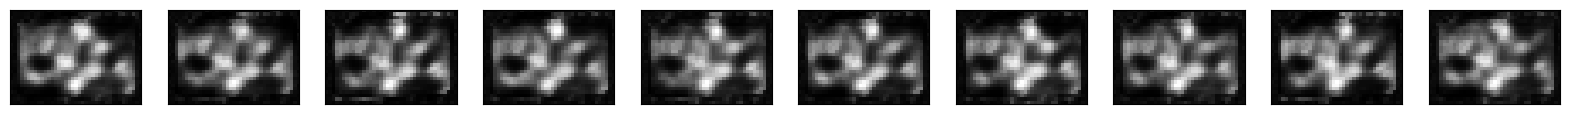

In [ ]:
random_encodings = np.random.rand(20,encoding_dim)
decoded_imgs = decoder_model.predict(random_encodings)

plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 39))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

I used the Gaussian Kernel Density Estimation (KDE) function from the SciPy library. Kernel Density Estimation is a non-parametric method for estimating the probability density function (PDF) of a random variable. The gaussian_kde function works for both univariate and multivariate data.

To generate the noisy data, I added random noise to the encoded images. I then applied the Gaussian Kernel Density Estimation to the noisy data.

This process resulted in outputs that more closely resembled digits.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


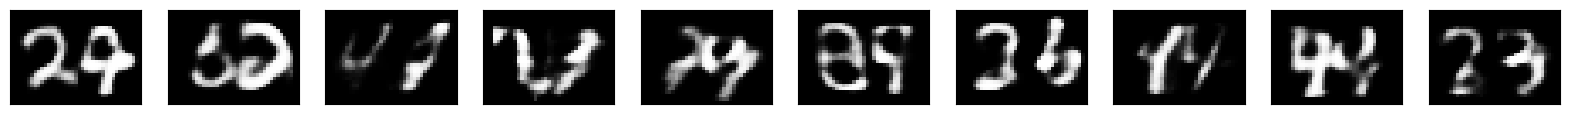

In [ ]:
from scipy.stats import gaussian_kde

n=10

random_encodings = np.zeros((n, encoding_dim))

for i in range(encoding_dim):
    # Add a small amount of noise to the data to perturb it slightly
    noisy_data = encoded_imgs[:, i] + np.random.normal(scale=1e-10, size=encoded_imgs[:, i].shape)

    kde = gaussian_kde(noisy_data)
    random_encodings[:, i] = kde.resample(n).reshape(-1)

decoded_imgs = decoder_model.predict(random_encodings)

plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 39))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 3.A [OPTIONAL] The use and evaluation of the latent (encoded) representations generated by the auto-encoder to solve the problem of supervised classification.

1. Obtain `x_train_df_encoded`, `x_test_df_encoded`, the latent (encoded) representations of `x_train_df` and `x_test_df` generated by the (encoder module of the) autoencoder developed in Section 2.

2. With the use of any classic machine learning method of your choice (avoid NNs), classify letters as in Sec.1 based on this representation.

3. Apply the same type of ML algorithm chosen in pt.2, but directly on the original data `x_train_df`, `x_test_df` (or you can use suitable dimensionality reduction methods if the chosen algorithm is known to require them or benefit from them).  

4. Compare (briefly) the performances on the test set, between the best model of Sec.1, the ML model trained on `x_train_df_encoded` and the ML model trained on `x_train_df` (or any other suitable representation that you choose in pt.3).


In other words, instead of feeding images directly through a classifier, you can try to use the encoded representations from the AE as input for a classic ML algorithm (XGB, SVM, RF ...) to solve the classification task.


## 3.A.1 Generation of Encoded Representations

In [ ]:
x_train = np.load('/content/drive/MyDrive/Magistrale/2°anno/Advanced ML/Assignment 2/x_train.npy')
y_train = np.load('/content/drive/MyDrive/Magistrale/2°anno/Advanced ML/Assignment 2/y_train.npy')
x_test = np.load('/content/drive/MyDrive/Magistrale/2°anno/Advanced ML/Assignment 2/x_test.npy')
y_test = np.load('/content/drive/MyDrive/Magistrale/2°anno/Advanced ML/Assignment 2/y_test.npy')

In [ ]:
def preprocess_mnist(x_train, y_train):
  x_train = x_train.reshape(x_train.shape[0], 28*39)
  x_train = x_train.astype('float32')
  x_train /= 255
  y_train = to_categorical(y_train)
  return x_train, y_train

In [ ]:
x_train, y_train = preprocess_mnist(x_train, y_train)
x_test, y_test = preprocess_mnist(x_test, y_test)

In [ ]:
x_train_encoder = encoder_model.predict(x_train)
x_test_encoder = encoder_model.predict(x_test)

2258/2258 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
x_train_encoder.shape

(72247, 42)

In [ ]:
x_test_encoder.shape

(24083, 42)

## 3.A.2 Classification Using Encoded Representations

In [ ]:
from sklearn import svm
cls_svm = svm.SVC()
cls_svm.fit(x_train_encoder, y_train.argmax(axis=1))


SVC()

In [ ]:
y_pred = cls_svm.predict(x_test_encoder)

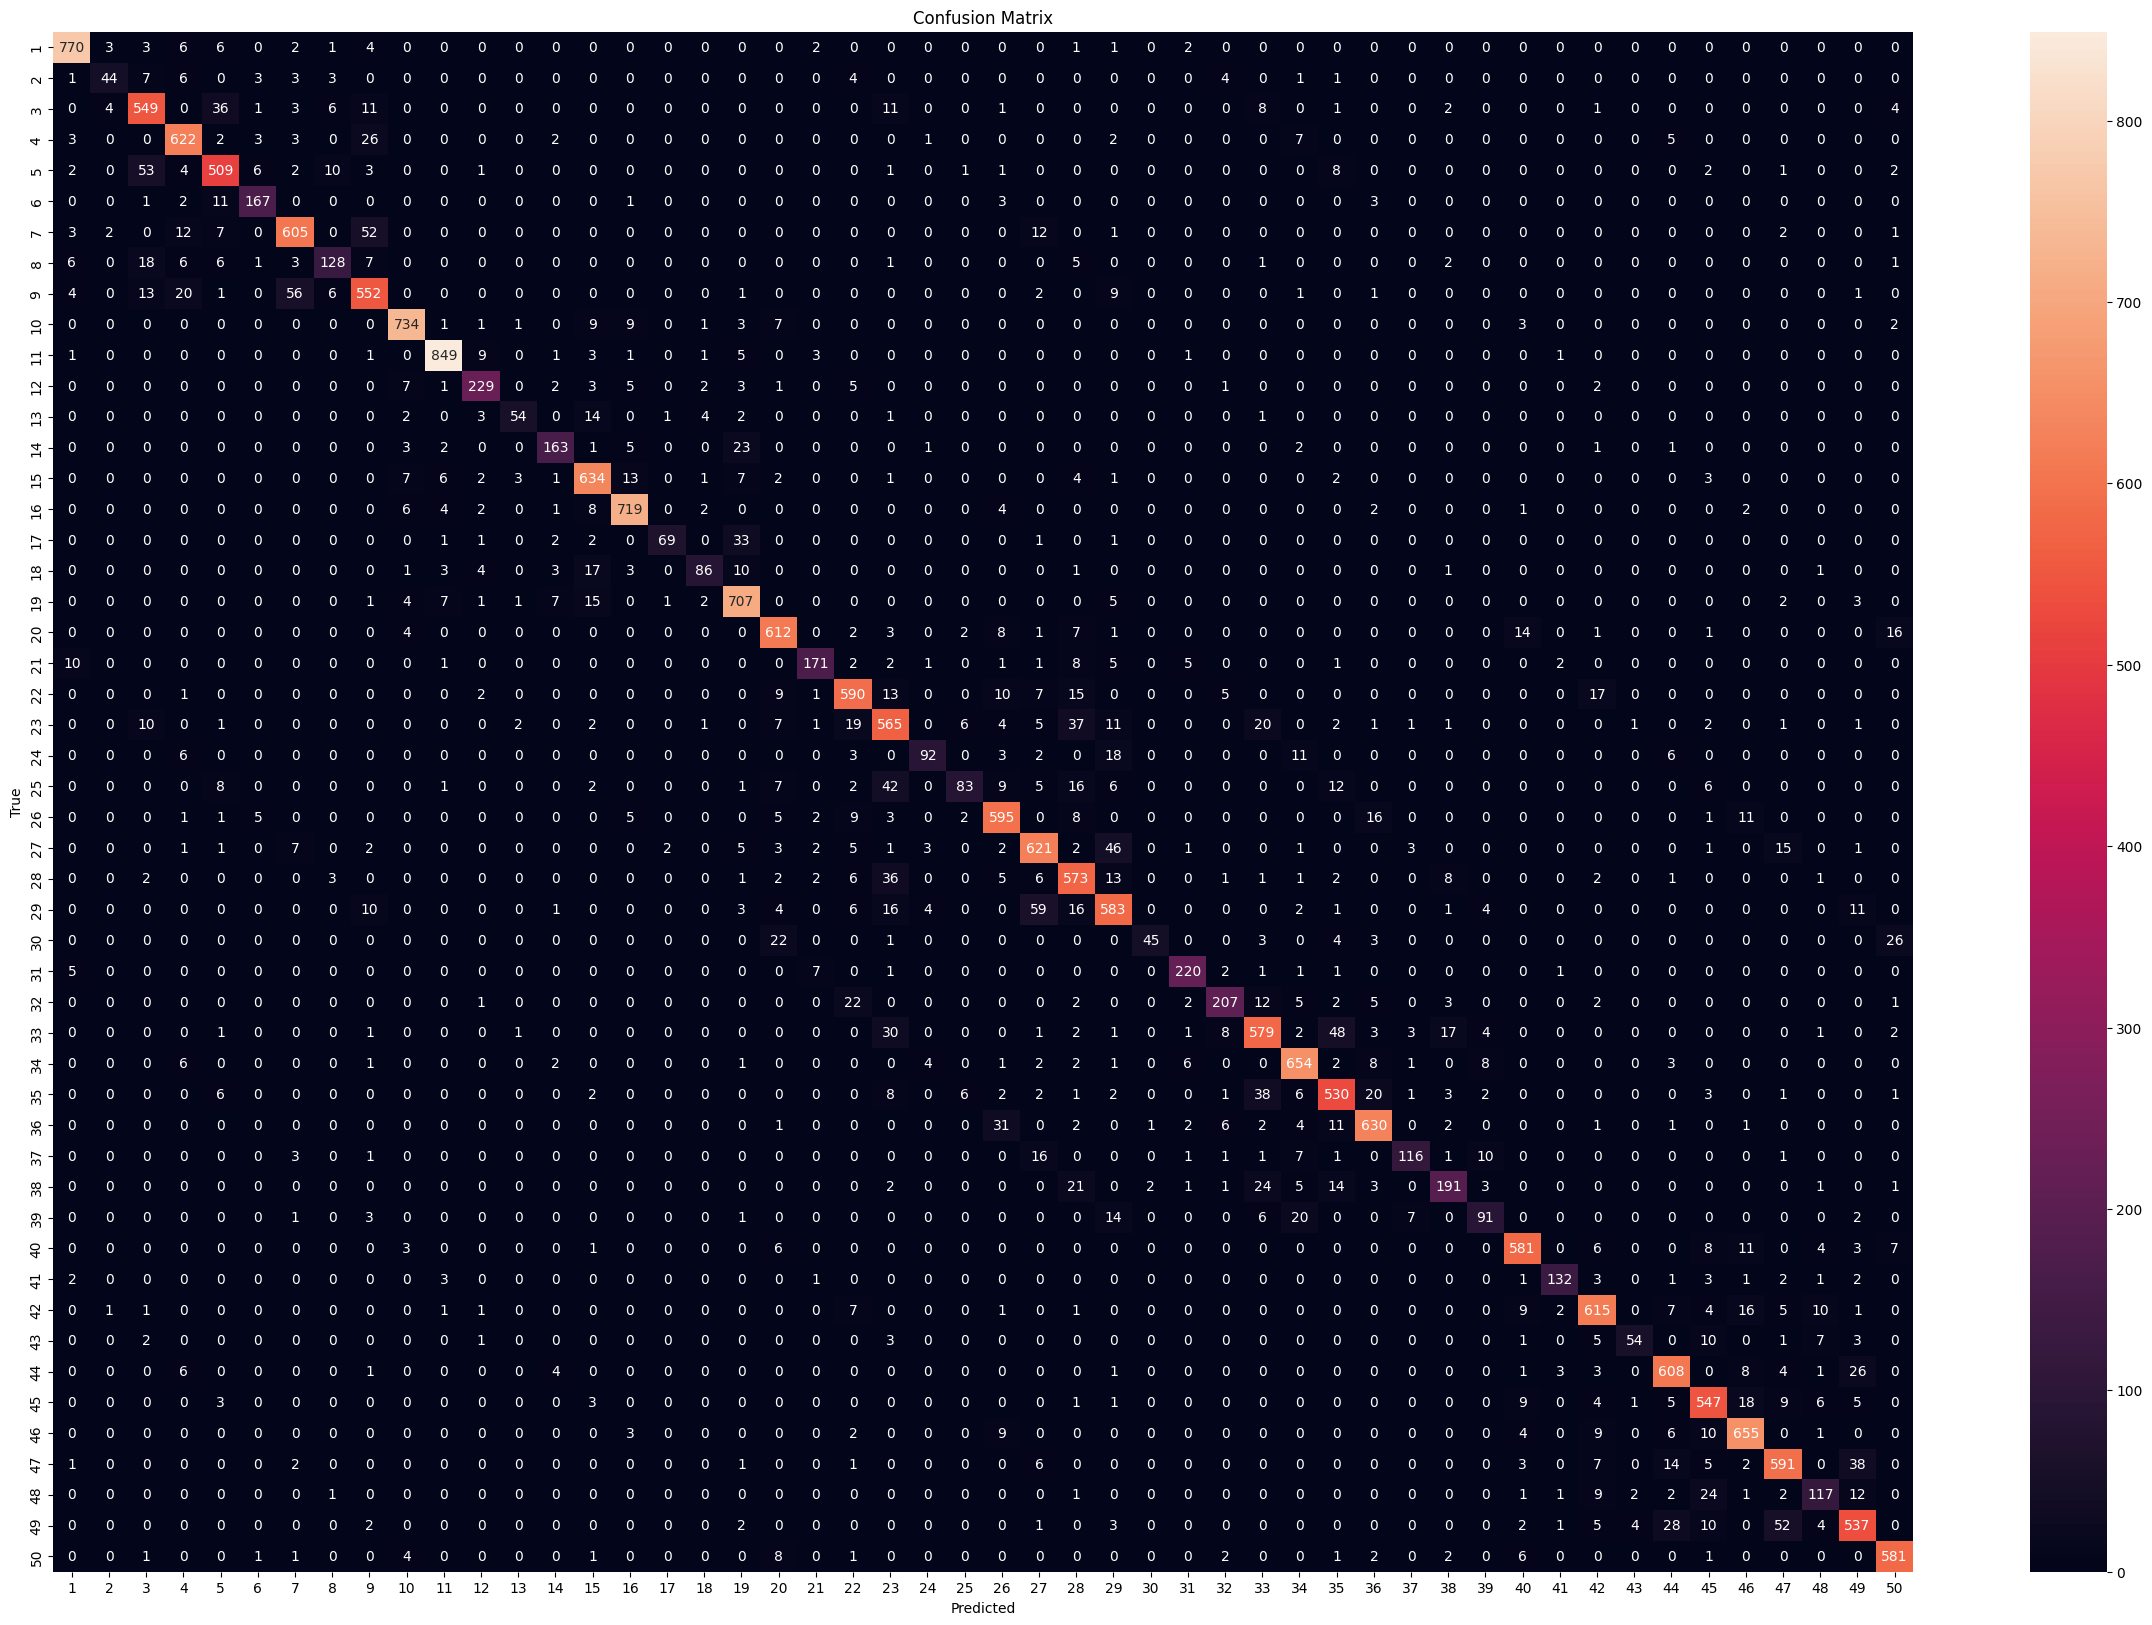

In [ ]:
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred)

labels = list(range(1, 51))

plt.figure(figsize=(30, 20))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
print(classification_report(y_test.argmax(axis=1), y_pred))

              precision    recall  f1-score   support

           1       0.95      0.96      0.96       801
           2       0.81      0.57      0.67        77
           3       0.83      0.86      0.85       638
           4       0.89      0.92      0.90       676
           5       0.85      0.84      0.84       606
           6       0.89      0.89      0.89       188
           7       0.88      0.87      0.87       697
           8       0.81      0.69      0.75       185
           9       0.81      0.83      0.82       667
          10       0.95      0.95      0.95       771
          11       0.96      0.97      0.97       876
          12       0.89      0.88      0.88       261
          13       0.87      0.66      0.75        82
          14       0.86      0.81      0.83       202
          15       0.88      0.92      0.90       687
          16       0.94      0.96      0.95       751
          17       0.95      0.63      0.75       110
          18       0.86    

Considering that the input to this SVM consists of 42 features compared to the original 1092 in the dataset, the accuracy on the test set is indeed very promising.

## 3.A.3 Classification on Original Data

I use PCA to retain only the most significant features, allowing the SVM to achieve better generalization on the data

In [ ]:
from sklearn.decomposition import PCA

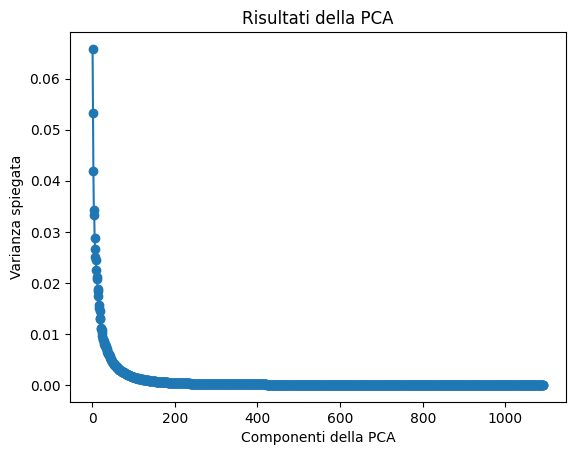

In [ ]:
pca_x_train = PCA().fit(x_train)

plt.plot(range(1, pca_x_train.n_components_ + 1), pca_x_train.explained_variance_ratio_, marker='o')
plt.xlabel('PCA')
plt.ylabel('Varianza spiegata')
plt.title("Risultati della PCA")
plt.show()

In [ ]:
pca = PCA(n_components=200).fit(x_train)
print(pca.explained_variance_ratio_)

[0.06583763 0.05336952 0.04191363 0.03436926 0.03337381 0.0286919
 0.02659651 0.02508892 0.02454125 0.02244283 0.02110787 0.02079046
 0.01887452 0.01840637 0.01737689 0.01573822 0.01499711 0.01441734
 0.01320104 0.01282035 0.01115254 0.01094442 0.01079364 0.01016948
 0.00968287 0.00908065 0.0087633  0.00851635 0.00810776 0.00799542
 0.00775712 0.0076782  0.00753533 0.00724986 0.00695333 0.00679783
 0.00646721 0.00632439 0.00610525 0.006038   0.00588374 0.00568245
 0.00548537 0.00526117 0.00505162 0.00490132 0.00470065 0.00464321
 0.00451267 0.00429881 0.00425952 0.00418696 0.00411671 0.00386944
 0.00382359 0.00380799 0.00369651 0.00356453 0.0035025  0.00346701
 0.00333744 0.00328086 0.00311805 0.00306059 0.0030033  0.00295388
 0.00291059 0.00283599 0.00275817 0.00275287 0.00265424 0.00261276
 0.0026077  0.00254053 0.00250506 0.00249219 0.0023334  0.00230211
 0.00228124 0.00224756 0.00221279 0.00214612 0.00211796 0.00204999
 0.00202811 0.00198722 0.00194171 0.00191314 0.00188145 0.00186

In [ ]:
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [ ]:
cls_svm = svm.SVC()
cls_svm.fit(x_train_pca, y_train.argmax(axis=1))

SVC()

In [ ]:
y_pred = cls_svm.predict(x_test_pca)

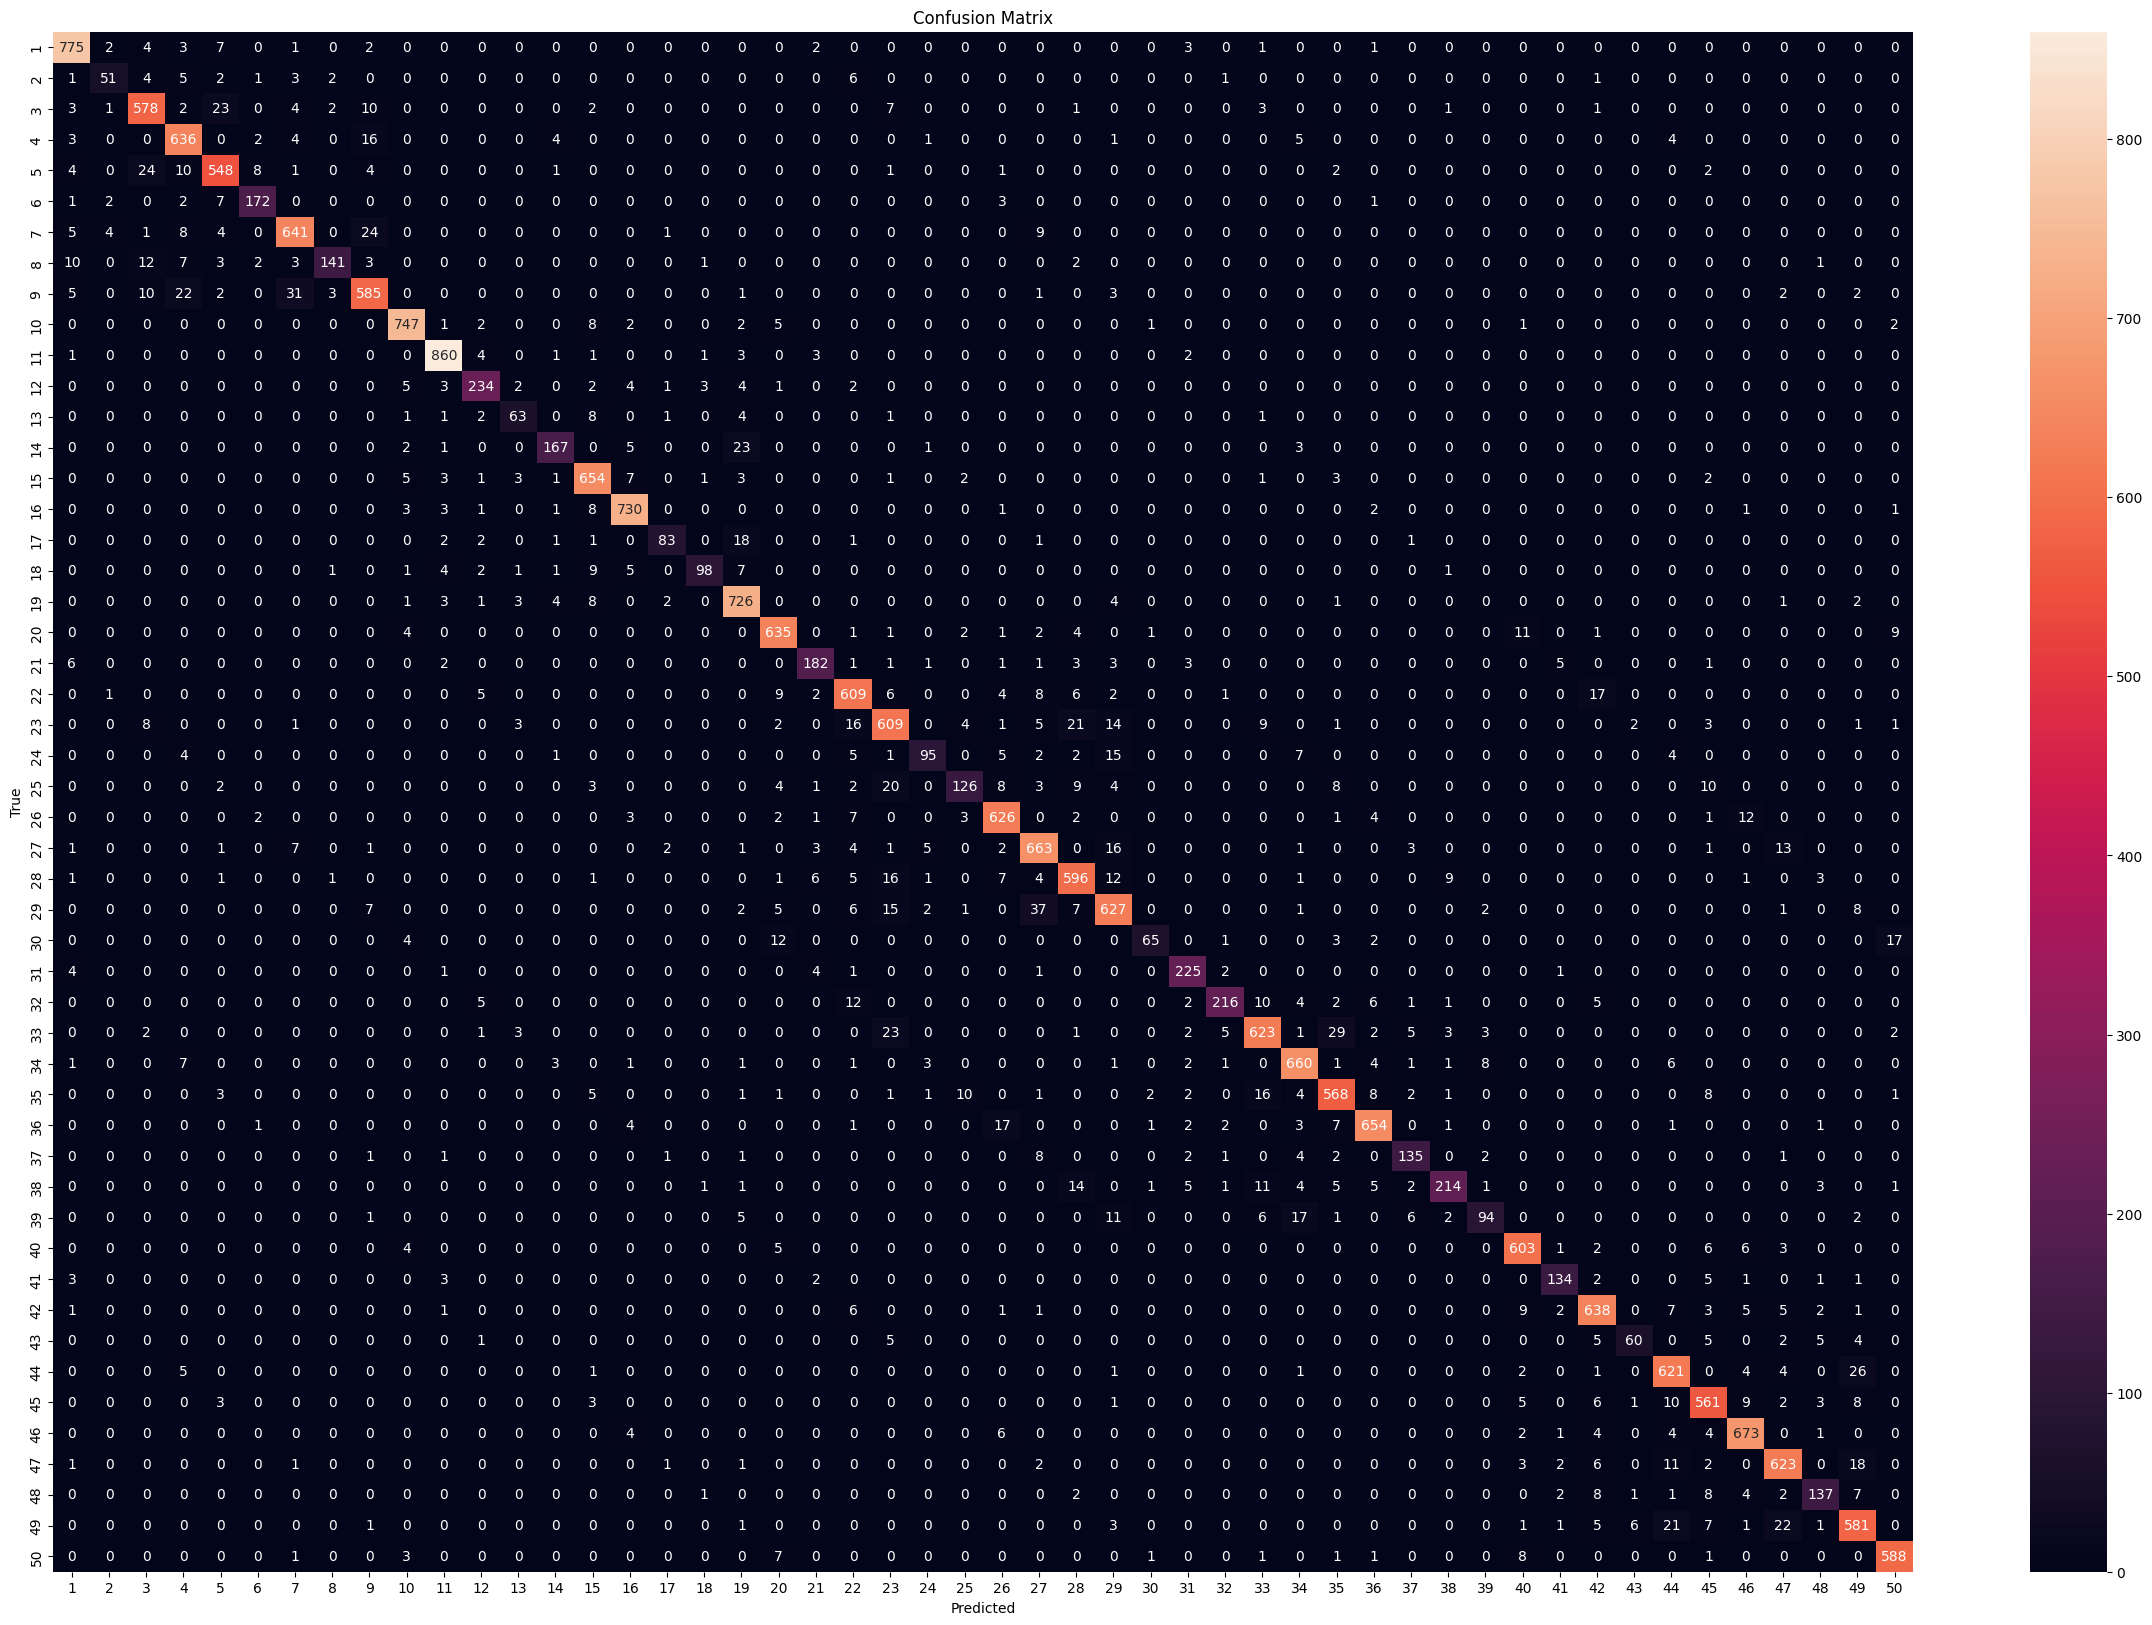

In [ ]:
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred)

labels = list(range(1, 51))

plt.figure(figsize=(30, 20))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
print(classification_report(y_test.argmax(axis=1), y_pred))

              precision    recall  f1-score   support

           1       0.94      0.97      0.95       801
           2       0.84      0.66      0.74        77
           3       0.90      0.91      0.90       638
           4       0.89      0.94      0.92       676
           5       0.90      0.90      0.90       606
           6       0.91      0.91      0.91       188
           7       0.92      0.92      0.92       697
           8       0.94      0.76      0.84       185
           9       0.89      0.88      0.89       667
          10       0.96      0.97      0.96       771
          11       0.97      0.98      0.97       876
          12       0.90      0.90      0.90       261
          13       0.81      0.77      0.79        82
          14       0.90      0.83      0.86       202
          15       0.92      0.95      0.93       687
          16       0.95      0.97      0.96       751
          17       0.90      0.75      0.82       110
          18       0.92    

I want to emphasize that with PCA, I have considered the first 200 components, which is still relatively few compared to the original 1092 features. However, it is also more than four times the number of features identified by the encoder, and the performance is not significantly different. For this reason, by examining the PCA graph, I would like to try selecting the first 20 components and evaluate the performance of the SVM.

In [ ]:
pca = PCA(n_components=20).fit(x_train)

In [ ]:
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [ ]:
from sklearn import svm
cls_svm = svm.SVC()
cls_svm.fit(x_train_pca, y_train.argmax(axis=1))

SVC()

In [ ]:
y_pred = cls_svm.predict(x_test_pca)

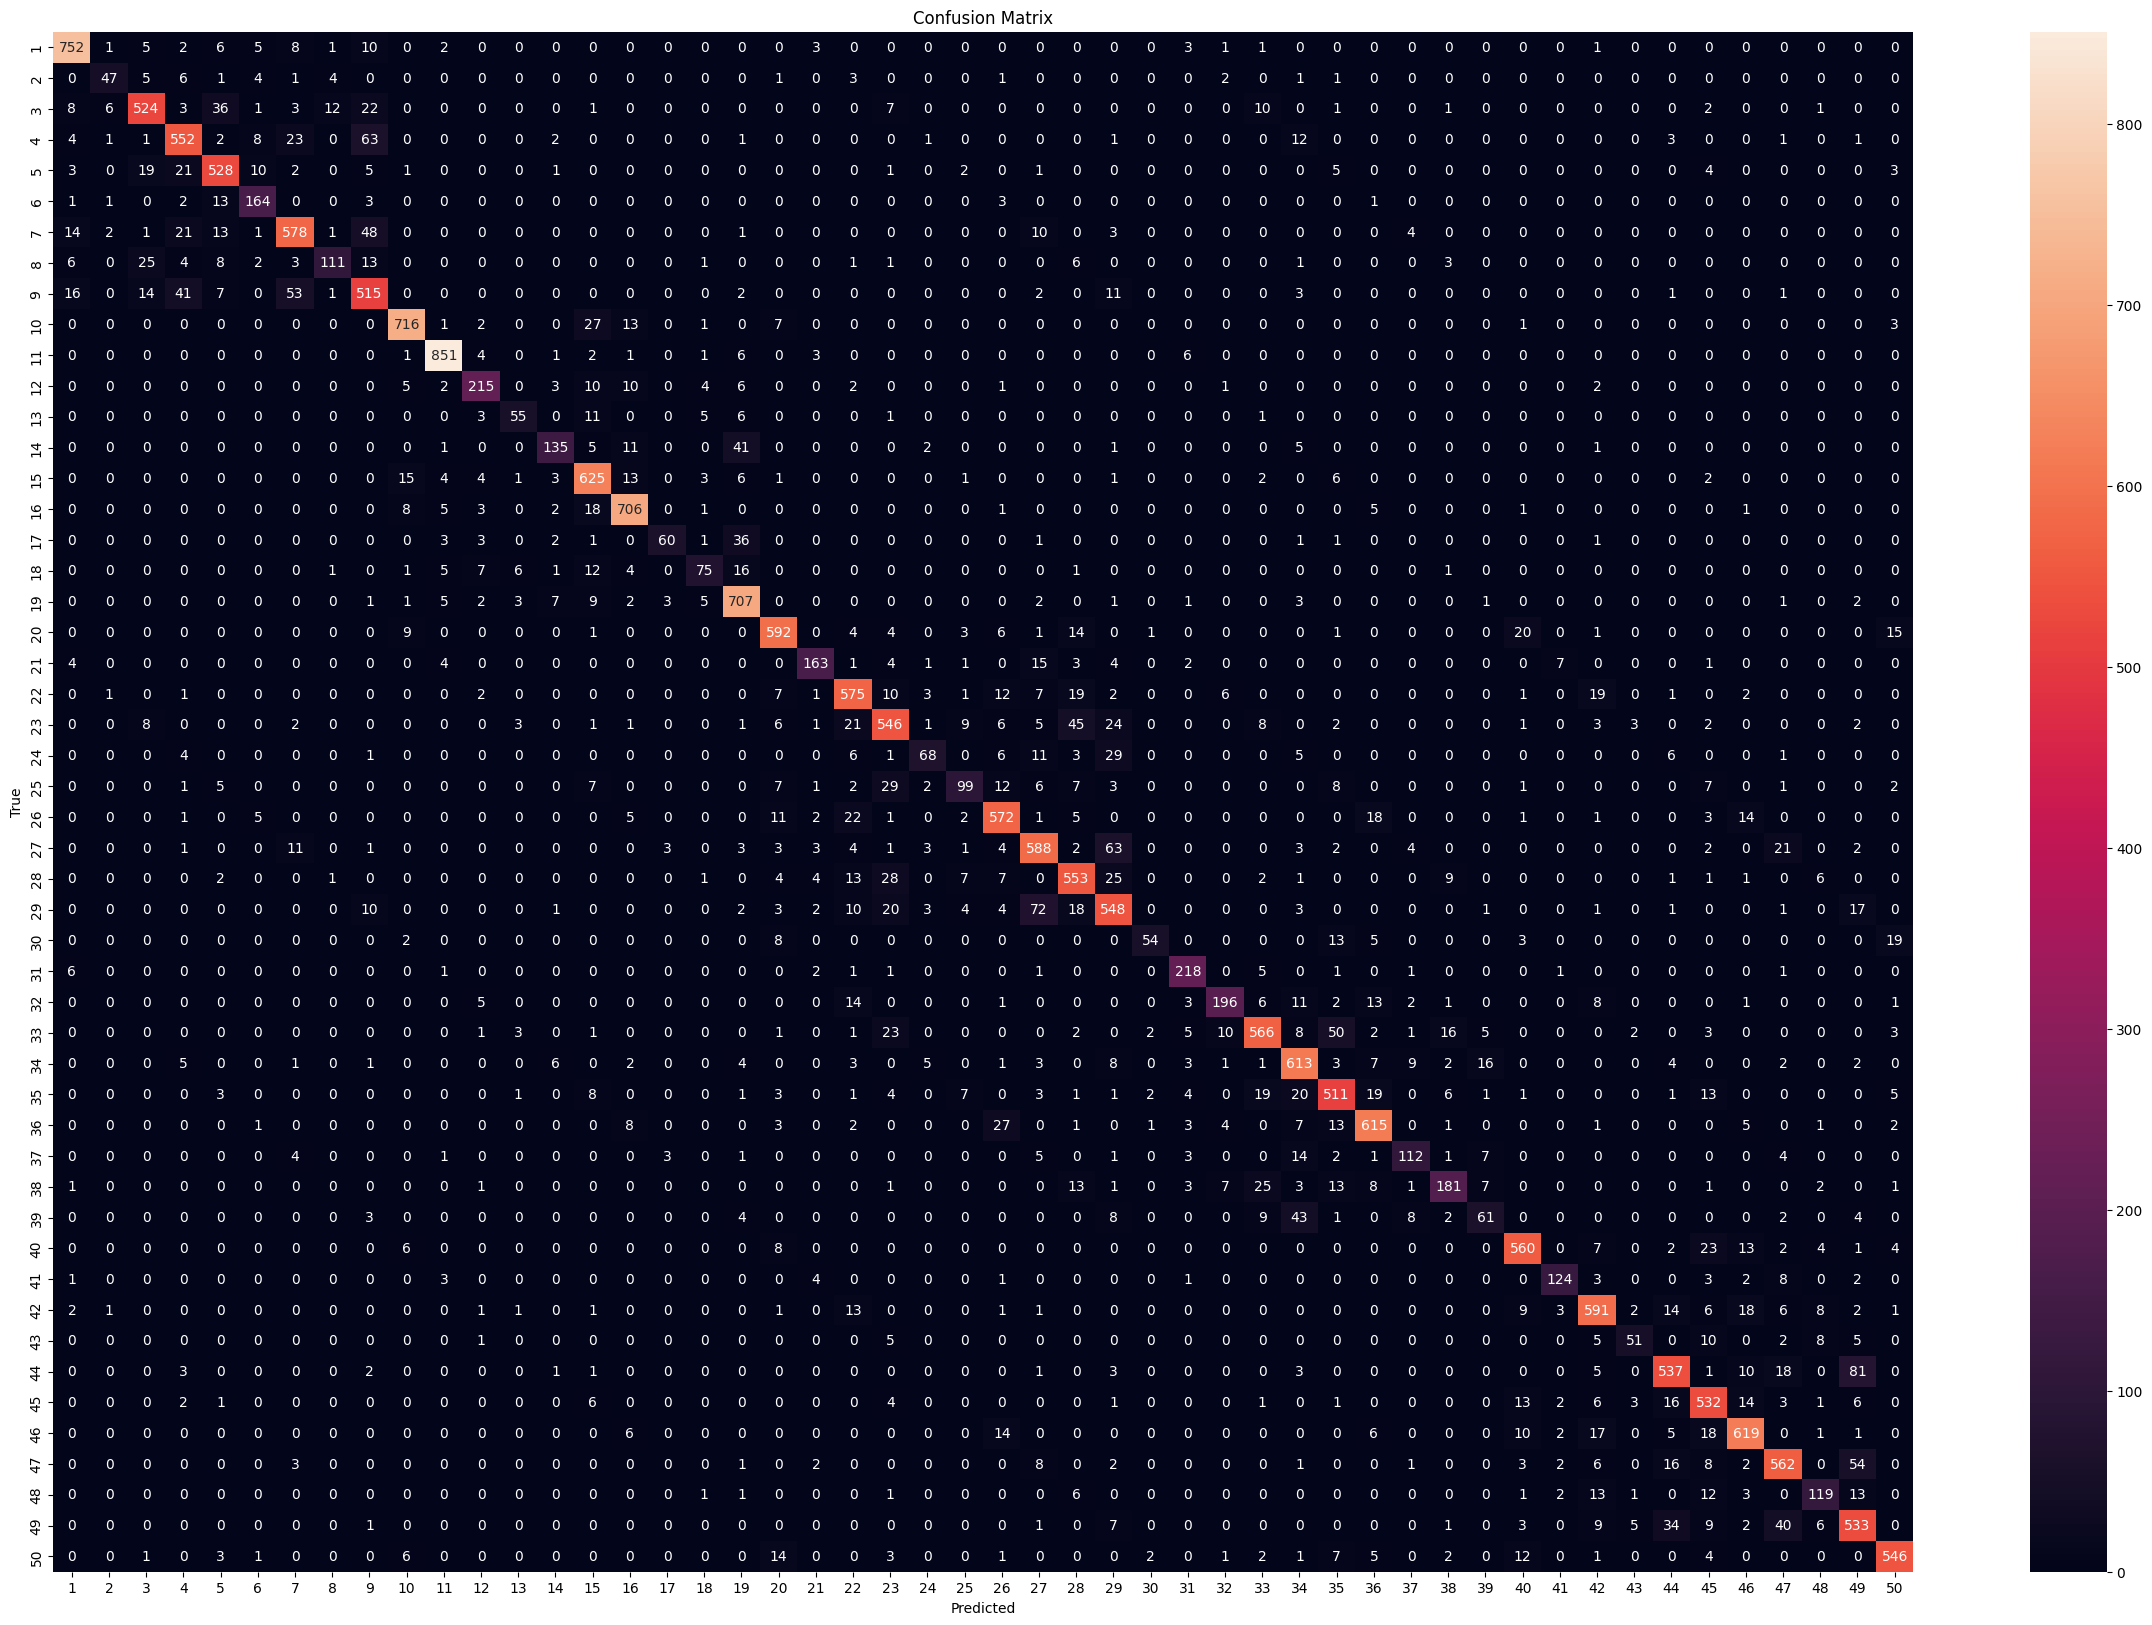

In [ ]:
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred)

labels = list(range(1, 51))

plt.figure(figsize=(30, 20))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
print(classification_report(y_test.argmax(axis=1), y_pred))

              precision    recall  f1-score   support

           1       0.92      0.94      0.93       801
           2       0.78      0.61      0.69        77
           3       0.87      0.82      0.84       638
           4       0.82      0.82      0.82       676
           5       0.84      0.87      0.86       606
           6       0.81      0.87      0.84       188
           7       0.84      0.83      0.83       697
           8       0.84      0.60      0.70       185
           9       0.74      0.77      0.75       667
          10       0.93      0.93      0.93       771
          11       0.96      0.97      0.96       876
          12       0.85      0.82      0.83       261
          13       0.75      0.67      0.71        82
          14       0.82      0.67      0.74       202
          15       0.84      0.91      0.87       687
          16       0.90      0.94      0.92       751
          17       0.87      0.55      0.67       110
          18       0.76    

This work was done to reduce the training set's number of components to a level more comparable to the encoder's output, aiming to retain as much relevant information while improving model performance.

The SVM model using the encoder achieves higher accuracy (0.87) compared to the SVM model using PCA (0.84). The encoder-based model also performs better in terms of precision, recall, and F1-score.

## 3.A.4 Performance Comparison and Analysis

Overall Accuracy:

- Neural Network (Non-regularized): 80%
- SVM with Encoder: 87%
- SVM with PCA: 91%

The SVM with PCA achieved the highest overall accuracy, suggesting that dimensionality reduction with PCA helped the SVM generalize better to the test data.

I used the SVM with PCA using the first 200 components, which is the one with the best performance.

Macro Average Scores (averaging each metric equally across all classes):

1. **Neural Network**:
* Precision: 0.77
* Recall: 0.72
* F1-Score: 0.73

2. **SVM with Encoder**:
* recision: 0.87
* Recall: 0.82
* F1-Score: 0.83

3. **SVM with PCA**:
* Precision: 0.90
* Recall: 0.87
* F1-Score: 0.88

The SVM with PCA outperformed in macro-averaged metrics, indicating that it handled each class more consistently, even across smaller or more challenging classes.

- The **neural network** achieves decent performance, but struggles with some classes, especially those with fewer samples.
A possible hypothesis for lower performance compared to SVMs could be limited training time. Neural networks tend to need substantial tuning and sufficient data for each class to generalize well, which might not have been fully achieved here.

- The **SVM with encoder-transformed data** shows significantly improved results over the neural network, likely due to the encoder's feature extraction, which may reduce irrelevant variance and highlight essential patterns in the data.

- The best performance is achieved with **SVM on PCA-reduced features**. PCA likely preserves the most critical variance while reducing dimensionality, helping the SVM avoid overfitting while capturing essential distinctions between classes


**Classes with Poor Performance**:
- The Neural Network struggled on classes like 2, 25, and 43 (low recall and precision).
- SVM with Encoder improved performance on most classes but still showed lower recall on class 25 and 43.
- SVM with PCA handled most classes with higher precision and recall, though classes with fewer samples like 30 and 43 still presented challenges.

# 3.B [OPTIONAL] Explain model's predictions

Take the networks defined in (1) and try to explain the predictions of the model.

*   Include at least one model-agnostic method and one model-specific method;
*   Compare the two investigated XAI methods;
*   Compare the results on the original and regularized model for a single XAI method;

### 3.B.1 XAI method definition

Describe the design choices made at this stage: why did you choose these two methods?

### 3.B.2 Result's comparison

Compare the results of both XAI methods and the results of applying the same method to different models.